# G2M insight for Cab Investment firm

**The aim of the project is to perform EDA to generate actionable insights to help XYZ identify the right cab company to make their investment.**


## Exploratory Data Analysis

In this notebook, we will go through the following steps. 

1. Data Preparation
   
   - Importing libraries and datasets
   - Data Overview/(Data Intake)
   - Data Cleaning and Modelling
   - Feature Engineering
   

2. **Data Analysis**

    - Hypothesis
         
    - Initial Categorical & Numerical variables Analysis (overall market picture)
        
        1. Categorical Variables
        2. Discrete Variables
        3. Continuous variables
        4. Temporal Variables
            
    - Further EDA
    
    - Demand Analysis
    
        1. Daily Demand Analysis
        
        2. Monthly Demand Analysis
        
        3. Demand Analysis by Customer Age
        
        4. Demand Analysis by Customer Income
    
    - Profit(loss) Analysis
    
        1. Profit Analysis by Distance Travelled
    
    - Customer Loyalty Analysis
 

3. Communication with stakeholders

===================================================================================================

## Data preparation

### Import Libraries and Datasets

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime, timedelta
import xlrd

In [2]:
# Import data
df_cab = pd.read_csv("Cab_Data.csv")
df_customer = pd.read_csv("Transaction_ID.csv")
df_transaction = pd.read_csv("Customer_ID.csv")
df_city = pd.read_csv("City.csv")

### Data Overview

In [3]:
print(df_cab.shape)

(359392, 7)


In [4]:
df_cab.head(10)

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   
5        10000016           42376  Pink Cab  ATLANTA GA          6.06   
6        10000017           42372  Pink Cab   AUSTIN TX         44.00   
7        10000018           42376  Pink Cab   AUSTIN TX         35.65   
8        10000019           42381  Pink Cab   BOSTON MA         14.40   
9        10000020           42375  Pink Cab   BOSTON MA         10.89   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
5          72.43        63.024  
6         576.15       475.200  
7         466.10       377.890  
8         191.61       146.880  
9         156.98       113.256

In [5]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
df_cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

The date of travel column needs to be converted to datetime format and timestamp data type for time analysis

In [7]:
print(df_customer.shape)

(440098, 3)


In [8]:
df_customer.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [9]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [10]:
df_customer.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [11]:
 df_customer['Customer ID'].duplicated().any()

True

Some customer have multiple transactions

In [12]:
len(df_cab["Transaction ID"]) - len(df_customer["Transaction ID"])

-80706

The customer Data also contains the unique transaction ID as we saw in Cab data. However, there are 80706 data entries(rows) more in df_customer than the df_cab dataframe. These rows will be lost when we merge these dataframes as it will have so many missing values especially the cab company column which makes these values useless for us. However before we remove these extra rows we can extract the useful information from this df_customer dataset

<AxesSubplot:title={'center':'Transaction Balance'}, xlabel='Payment Mode', ylabel='Frequency'>

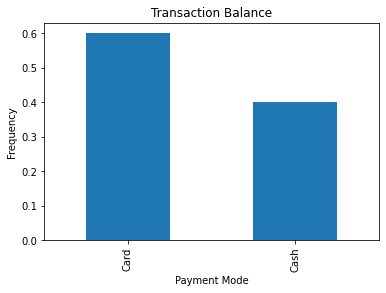

In [13]:
# Plot Transaction balance
df_customer["Payment_Mode"].value_counts(normalize = True).plot(
    kind="bar",
    xlabel="Payment Mode",
    ylabel="Frequency",
    title="Transaction Balance"
)
# 60% of the people uses card for transactions while 40% use cash

In [14]:
print(df_transaction.shape)

(49171, 4)


In [15]:
df_transaction.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [16]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [17]:
df_transaction.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [18]:
print(df_city.shape)

(20, 3)


In [19]:
df_city.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [20]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [21]:
df_city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

The df_city contains the number of population and users whose datatype is given as object which needs to be changed to int and commas removed.  

### Data Cleaning and Modelling

#### Removing commas and correcting datatypes

In [22]:
for column in ["Population","Users"]:
    df_city[column] = df_city[column].str.replace(',','')
    df_city[column] = df_city[column].astype(int)

df_city.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [23]:
df_city.head()

City  Population   Users
0     NEW YORK NY     8405837  302149
1      CHICAGO IL     1955130  164468
2  LOS ANGELES CA     1595037  144132
3        MIAMI FL     1339155   17675
4  SILICON VALLEY     1177609   27247

#### Merging Dataframes

In [24]:
# The data entries(rows) are greater for df_customer than the df_cab dataframe.
# If we include those rows we will have a lot of misin information for those transactions
# such as the cab company used to perform that transaction. Since Cab company is the most valuable 
# column for our purpose we chose to drop those extra transaction rows in our merged dataframe.
df_all = df_cab.merge(df_customer, on= 'Transaction ID').merge(df_transaction, on ='Customer ID').merge(df_city, on = 'City')
df_all

Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10351127           43302  Yellow Cab     ATLANTA GA   
2             10412921           43427  Yellow Cab     ATLANTA GA   
3             10000012           42375    Pink Cab     ATLANTA GA   
4             10320494           43211  Yellow Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10307228           43162  Yellow Cab  WASHINGTON DC   
359388        10319775           43203  Yellow Cab  WASHINGTON DC   
359389        10347676           43287  Yellow Cab  WASHINGTON DC   
359390        10358624           43314  Yellow Cab  WASHINGTON DC   
359391        10370709           43342  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         Card   
1              26.19         598.70      317.4228        29290         Cash   
2              42.55         792.05      597.4020        29290         Card   
3              28.62         358.52      334.8540        27703         Card   
4              36.38         721.10      467.1192        27703         Card   
...              ...            ...           ...          ...          ...   
359387         38.40         668.93      525.3120        51406         Cash   
359388          3.57          67.60       44.5536        51406         Cash   
359389         23.46         331.97      337.8240        51406         Card   
359390         27.60         358.23      364.3200        51406         Cash   
359391         34.24         453.11      427.3152        51406         Card   

        Gender  Age  Income (USD/Month)  Population   Users  
0         Male   28               10813      814885   24701  
1         Male   28               10813      814885   24701  
2         Male   28               10813      814885   24701  
3         Male   27                9237      814885   24701  
4         Male   27                9237      814885   24701  
...        ...  ...                 ...         ...     ...  
359387  Female   29                6829      418859  127001  
359388  Female   29                6829      418859  127001  
359389  Female   29                6829      418859  127001  
359390  Female   29                6829      418859  127001  
359391  Female   29                6829      418859  127001  

[359392 rows x 14 columns]

#### Rearranging columns

In [25]:
# rearrange columns
cols = list(df_all.columns)
cols = cols[0:4] + cols[12:14] + cols[4:12]
df = df_all[cols]
df

Transaction ID  Date of Travel     Company           City  Population  \
0             10000011           42377    Pink Cab     ATLANTA GA      814885   
1             10351127           43302  Yellow Cab     ATLANTA GA      814885   
2             10412921           43427  Yellow Cab     ATLANTA GA      814885   
3             10000012           42375    Pink Cab     ATLANTA GA      814885   
4             10320494           43211  Yellow Cab     ATLANTA GA      814885   
...                ...             ...         ...            ...         ...   
359387        10307228           43162  Yellow Cab  WASHINGTON DC      418859   
359388        10319775           43203  Yellow Cab  WASHINGTON DC      418859   
359389        10347676           43287  Yellow Cab  WASHINGTON DC      418859   
359390        10358624           43314  Yellow Cab  WASHINGTON DC      418859   
359391        10370709           43342  Yellow Cab  WASHINGTON DC      418859   

         Users  KM Travelled  Price Charged  Cost of Trip  Customer ID  \
0        24701         30.45         370.95      313.6350        29290   
1        24701         26.19         598.70      317.4228        29290   
2        24701         42.55         792.05      597.4020        29290   
3        24701         28.62         358.52      334.8540        27703   
4        24701         36.38         721.10      467.1192        27703   
...        ...           ...            ...           ...          ...   
359387  127001         38.40         668.93      525.3120        51406   
359388  127001          3.57          67.60       44.5536        51406   
359389  127001         23.46         331.97      337.8240        51406   
359390  127001         27.60         358.23      364.3200        51406   
359391  127001         34.24         453.11      427.3152        51406   

       Payment_Mode  Gender  Age  Income (USD/Month)  
0              Card    Male   28               10813  
1              Cash    Male   28               10813  
2              Card    Male   28               10813  
3              Card    Male   27                9237  
4              Card    Male   27                9237  
...             ...     ...  ...                 ...  
359387         Cash  Female   29                6829  
359388         Cash  Female   29                6829  
359389         Card  Female   29                6829  
359390         Cash  Female   29                6829  
359391         Card  Female   29                6829  

[359392 rows x 14 columns]

In [26]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int32  
 13  Users               359392 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(4)
memory usage: 38.4+ MB


In [27]:
df.isnull().mean()
# No missing values in the datatset

Transaction ID        0.0
Date of Travel        0.0
Company               0.0
City                  0.0
Population            0.0
Users                 0.0
KM Travelled          0.0
Price Charged         0.0
Cost of Trip          0.0
Customer ID           0.0
Payment_Mode          0.0
Gender                0.0
Age                   0.0
Income (USD/Month)    0.0
dtype: float64

In [28]:
# check for duplicate values
df.duplicated().any()

False

Now our complete dataframe is ready to be analyzed. There are no missing or duplicated values in the dataframe and all datatypes are correct. Before we start analysis we can perform feature engineering to help with our analysis.

### Feature Engineering

#### Convert Date of travel to datetime object

In [29]:
df.head()

Transaction ID  Date of Travel     Company        City  Population  Users  \
0        10000011           42377    Pink Cab  ATLANTA GA      814885  24701   
1        10351127           43302  Yellow Cab  ATLANTA GA      814885  24701   
2        10412921           43427  Yellow Cab  ATLANTA GA      814885  24701   
3        10000012           42375    Pink Cab  ATLANTA GA      814885  24701   
4        10320494           43211  Yellow Cab  ATLANTA GA      814885  24701   

   KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  \
0         30.45         370.95      313.6350        29290         Card   Male   
1         26.19         598.70      317.4228        29290         Cash   Male   
2         42.55         792.05      597.4020        29290         Card   Male   
3         28.62         358.52      334.8540        27703         Card   Male   
4         36.38         721.10      467.1192        27703         Card   Male   

   Age  Income (USD/Month)  
0   28               10813  
1   28               10813  
2   28               10813  
3   27                9237  
4   27                9237

In [30]:
# Convert "Date of Travel" values
df["Date of Travel"] = df["Date of Travel"].map(lambda x: datetime(*xlrd.xldate_as_tuple(x, 0)))
df.head()

Transaction ID Date of Travel     Company        City  Population  Users  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA      814885  24701   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA      814885  24701   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA      814885  24701   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA      814885  24701   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA      814885  24701   

   KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode Gender  \
0         30.45         370.95      313.6350        29290         Card   Male   
1         26.19         598.70      317.4228        29290         Cash   Male   
2         42.55         792.05      597.4020        29290         Card   Male   
3         28.62         358.52      334.8540        27703         Card   Male   
4         36.38         721.10      467.1192        27703         Card   Male   

   Age  Income (USD/Month)  
0   28               10813  
1   28               10813  
2   28               10813  
3   27                9237  
4   27                9237

In [31]:
df=df.sort_values(by=['Date of Travel'])

In [32]:
df.tail()

Transaction ID Date of Travel     Company            City  Population  \
325663        10436500     2018-12-31  Yellow Cab   WASHINGTON DC      418859   
159597        10433435     2018-12-31    Pink Cab        MIAMI FL     1339155   
23407         10436696     2018-12-31    Pink Cab       BOSTON MA      248968   
117860        10433418     2018-12-31    Pink Cab  LOS ANGELES CA     1595037   
87418         10434637     2018-12-31  Yellow Cab      CHICAGO IL     1955130   

         Users  KM Travelled  Price Charged  Cost of Trip  Customer ID  \
325663  127001         11.00         166.49      132.0000        53140   
159597   17675          2.30          29.53       23.9200         9774   
23407    80021         27.55         377.85      330.6000        60000   
117860  144132          2.34          29.21       25.0380         7650   
87418   164468          3.36          44.86       43.9488         5926   

       Payment_Mode  Gender  Age  Income (USD/Month)  
325663         Card  Female   40                7870  
159597         Cash  Female   33               14322  
23407          Cash  Female   27               20303  
117860         Card  Female   32               17629  
87418          Card    Male   58               31841

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 12812 to 87418
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   Population          359392 non-null  int32         
 5   Users               359392 non-null  int32         
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392

#### Create new features

In [34]:
# Year and month column
df['year'] = pd.DatetimeIndex(df['Date of Travel']).year
df['month'] = pd.DatetimeIndex(df['Date of Travel']).month
df["day"] = pd.DatetimeIndex(df["Date of Travel"]).day

In [35]:
# Profit column
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]

In [36]:
# Users/Population
df["Users/Population"] = df["Users"] / df["Population"]

In [37]:
df.head()

Transaction ID Date of Travel     Company           City  Population  \
12812         10000429     2016-01-02  Yellow Cab      BOSTON MA      248968   
43828         10000525     2016-01-02  Yellow Cab     CHICAGO IL     1955130   
297325        10001234     2016-01-02  Yellow Cab     SEATTLE WA      671238   
316639        10001311     2016-01-02  Yellow Cab  WASHINGTON DC      418859   
171893        10000927     2016-01-02  Yellow Cab    NEW YORK NY     8405837   

         Users  KM Travelled  Price Charged  Cost of Trip  Customer ID  \
12812    80021         15.15         342.62      205.4340        57474   
43828   164468          2.18          51.47       26.4216         4551   
297325   25063         39.60        1119.67      541.7280        38146   
316639  127001         34.65         707.94      474.0120        53048   
171893  302149         34.56        1121.11      485.2224         1808   

       Payment_Mode Gender  Age  Income (USD/Month)  year  month  day  \
12812          Card   Male   34               16558  2016      1    2   
43828          Cash   Male   19                6316  2016      1    2   
297325         Cash   Male   36                6577  2016      1    2   
316639         Card   Male   23               31566  2016      1    2   
171893         Cash   Male   59               18999  2016      1    2   

          Profit  Users/Population  
12812   137.1860          0.321411  
43828    25.0484          0.084121  
297325  577.9420          0.037338  
316639  233.9280          0.303207  
171893  635.8876          0.035945

In [38]:
# rearrange columns
cols = list(df.columns)
cols = cols[0:2] + cols[14:17] + cols[2:6] + cols[18:] + cols[6:9] + cols[17:18] + cols[9:14]
df = df[cols]
df.head()

Transaction ID Date of Travel  year  month  day     Company  \
12812         10000429     2016-01-02  2016      1    2  Yellow Cab   
43828         10000525     2016-01-02  2016      1    2  Yellow Cab   
297325        10001234     2016-01-02  2016      1    2  Yellow Cab   
316639        10001311     2016-01-02  2016      1    2  Yellow Cab   
171893        10000927     2016-01-02  2016      1    2  Yellow Cab   

                 City  Population   Users  Users/Population  KM Travelled  \
12812       BOSTON MA      248968   80021          0.321411         15.15   
43828      CHICAGO IL     1955130  164468          0.084121          2.18   
297325     SEATTLE WA      671238   25063          0.037338         39.60   
316639  WASHINGTON DC      418859  127001          0.303207         34.65   
171893    NEW YORK NY     8405837  302149          0.035945         34.56   

        Price Charged  Cost of Trip    Profit  Customer ID Payment_Mode  \
12812          342.62      205.4340  137.1860        57474         Card   
43828           51.47       26.4216   25.0484         4551         Cash   
297325        1119.67      541.7280  577.9420        38146         Cash   
316639         707.94      474.0120  233.9280        53048         Card   
171893        1121.11      485.2224  635.8876         1808         Cash   

       Gender  Age  Income (USD/Month)  
12812    Male   34               16558  
43828    Male   19                6316  
297325   Male   36                6577  
316639   Male   23               31566  
171893   Male   59               18999

Lets Begin our data analysis now!

## Data Analysis

### Hypothesis

We can generate some hypothesis so we can approach data analysis with some structure.

Hyothesis: Is there any seasonality in number of customers using the cab service?

Hypothesis: Is some specific age group taking taxi more? Is there a certain age group which prefer one of the company?

Hypothesis: Which cab is more profitable over this period? Which cab has higher demand? Is the cab with more customers more profitable as well? 
    
Hypothesis: Which city has the highest Transactions?
Are these high demand areas more profitable for both companies?
Do the companies have monopolies in certain area? In which cities does yellow cab have the market share majority and in which cities does pink cab have the market share majority?

Hypothesis: Are the customers of any particular company more prone to use card?

Hypothesis: Does gender have any preference of choice for taxi?

Hypothesis: Are the people who take taxi more aften are wealthier?

Hypothesis: long distance vs small distance, which one is more cheaper for customer. For company, is the profit margin better in long distances or small distances

Hypothesis: Are the customers loyal to any particular cab? Which cab company has more loyal customers?

### Initial Categorical & Numerical variables Analysis (overall market picture)

#### Variable Types

In [39]:
categorical_var = [var for var in df.columns if df[var].dtype=="O"]
categorical_var

['Company', 'City', 'Payment_Mode', 'Gender']

In [40]:
numerical_var = [var for var in df.columns if var not in categorical_var and var != "Date of Travel"]
numerical_var

['Transaction ID',
 'year',
 'month',
 'day',
 'Population',
 'Users',
 'Users/Population',
 'KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Profit',
 'Customer ID',
 'Age',
 'Income (USD/Month)']

In [41]:
temporal_var = [var for var in numerical_var if var == "year" or var =="month" or var=="day"]
temporal_var

['year', 'month', 'day']

In [42]:
discrete_var = [var for var in numerical_var if len(df[var].unique()) < 32 and var not in temporal_var]
discrete_var

['Population', 'Users', 'Users/Population']

In [43]:
redundant= ["Transaction ID", "Customer ID"]

In [44]:
# make list of continuous variables
continuous_var = [
    var for var in numerical_var if var not in discrete_var+temporal_var+redundant]
continuous_var

['KM Travelled',
 'Price Charged',
 'Cost of Trip',
 'Profit',
 'Age',
 'Income (USD/Month)']

#### Initial Categorical Variables Analysis

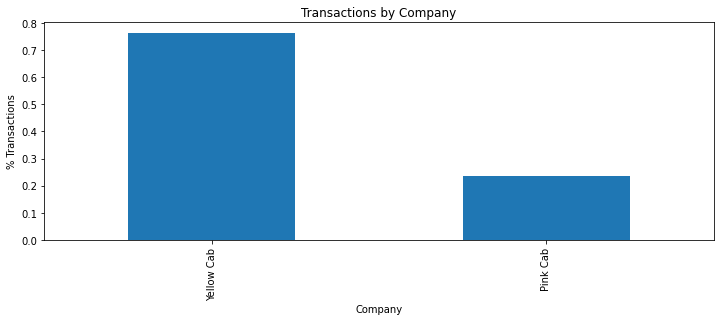

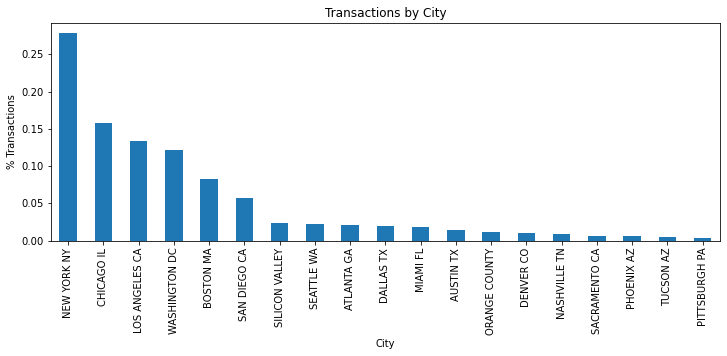

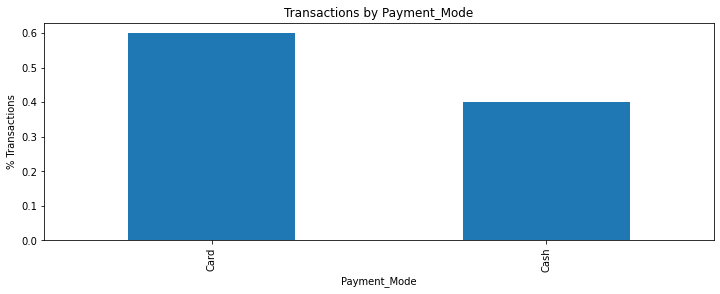

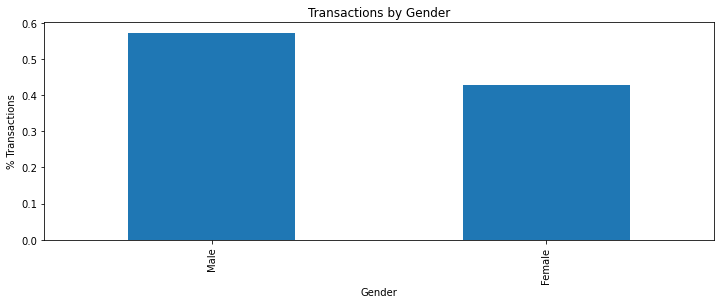

In [45]:
for var in categorical_var:
    
    plt.figure(figsize=(12,4))
    
    # plot transformed variable vs sale price
    df[var].value_counts(normalize = True).plot(
    kind="bar",
    xlabel=f"{var}",
    ylabel="% Transactions",
    title=f"Transactions by {var}"
    )
                
    plt.show()

There are some points to be noted from the categorical variables
1. Yellow cab has much more transactions than pink cab in the whole period (ratio of 3:1).


2. The highest number of transactions happened in new york followed by chicago.

    
3. 60% of transactions happen through the card compared to 40% by cash.
   

4. Around 57.3% of transactions are carried by men compared to 42.7% by women.

#### Initial Numerical Variables Analysis

##### Continuous variables 

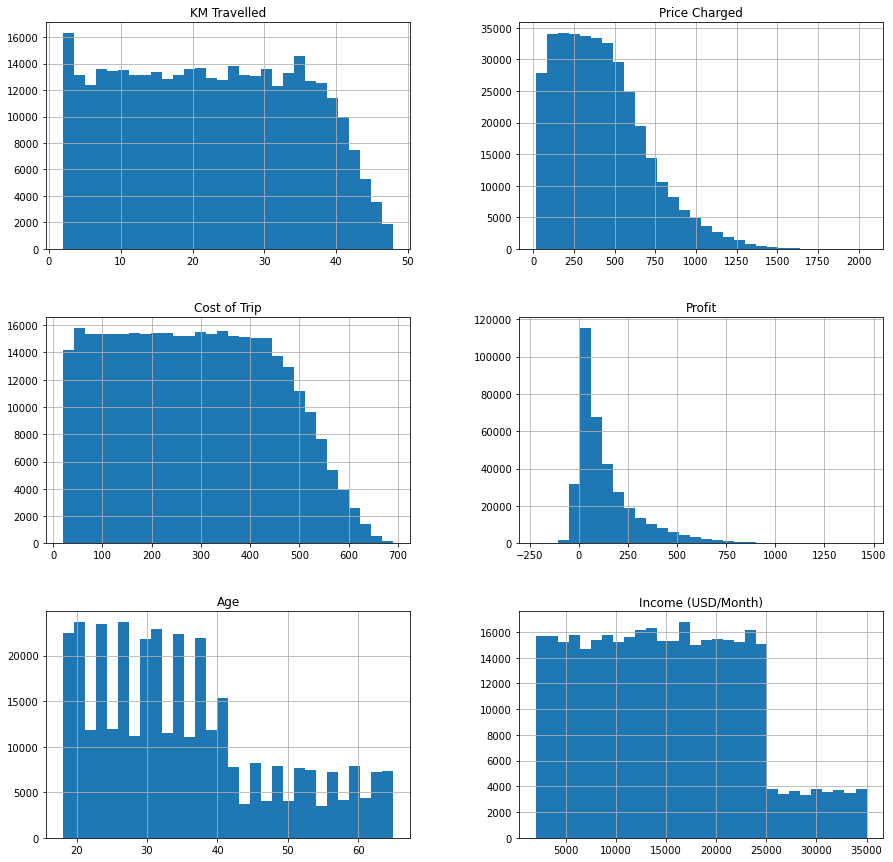

In [46]:
# lets plot histograms for all continuous variables

df[continuous_var].hist(bins=30, figsize=(15,15))
plt.show()

In [47]:
df["KM Travelled"].max()

48.0

There are some points to be noted from the continuous variables
1. The maximum distance travelled by any passenger within all transactions is 48 km. There is a spike in transactions for the short distances under 5 km. The number of people travelling distances longer than 35 km decreases rapidly.


2. The number of transactions being charged more than 500 usd decreases rapidly. This makes sense as less people are travelling very long diistanecs as well. cost of trip also follows a similar trajectory.

    
3. The number of transactions with high profit margins decreases. There are some losses as well.


4. Most of the transactions are being done by relatively younger people. The number of transactions decreases for people older than 40 years old. 
   

5. People with incomes greater than 25000 have much lower transactions.

##### Discrete Variables

In [48]:
print(sorted(df["Users"].unique()))

[3643, 5712, 6133, 7044, 9270, 12421, 12994, 14978, 17675, 22157, 24701, 25063, 27247, 69995, 80021, 127001, 144132, 164468, 302149]


In [49]:
df.loc[df['Users'] == 164468].head()

Transaction ID Date of Travel  year  month  day     Company  \
43828        10000525     2016-01-02  2016      1    2  Yellow Cab   
43731        10000519     2016-01-02  2016      1    2  Yellow Cab   
43679        10000516     2016-01-02  2016      1    2  Yellow Cab   
43070        10000486     2016-01-02  2016      1    2  Yellow Cab   
43844        10000526     2016-01-02  2016      1    2  Yellow Cab   

             City  Population   Users  Users/Population  KM Travelled  \
43828  CHICAGO IL     1955130  164468          0.084121          2.18   
43731  CHICAGO IL     1955130  164468          0.084121         13.92   
43679  CHICAGO IL     1955130  164468          0.084121          4.72   
43070  CHICAGO IL     1955130  164468          0.084121         41.80   
43844  CHICAGO IL     1955130  164468          0.084121         16.80   

       Price Charged  Cost of Trip    Profit  Customer ID Payment_Mode Gender  \
43828          51.47       26.4216   25.0484         4551         Cash   Male   
43731         327.23      185.4144  141.8156         4429         Cash   Male   
43679         105.79       62.8704   42.9196         5803         Card   Male   
43070         944.35      526.6800  417.6700         5438         Card   Male   
43844         397.98      205.6320  192.3480         3820         Card   Male   

       Age  Income (USD/Month)  
43828   19                6316  
43731   20               23387  
43679   54                4964  
43070   32                6295  
43844   39               18836

In [50]:
print(sorted(df["Users/Population"].unique()))

[0.006496828916132327, 0.006720348284863075, 0.009045961465977873, 0.01261326849061091, 0.012906393831901732, 0.013198621518793568, 0.01646838576408086, 0.0214470532138362, 0.023137560939157226, 0.023498580985631685, 0.028329131331652532, 0.03031225264914681, 0.035945141453492375, 0.037338470110452625, 0.072964129314182, 0.08412126047884284, 0.09036279409192388, 0.3032070458077778, 0.32141078371517623]


Notes:

1. Newyork and chicago has the highest cab transactions overall.

2. However, Boston and washington DC has the highest ratio of users/population.

##### Temporal Variables

In [51]:
# let's explore the values of these temporal variables

for var in temporal_var:
    print(var, df[var].unique())
    print()

year [2016 2017 2018]

month [ 1  2  3  4  5  6  7  8  9 10 11 12]

day [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31  1]



We can explore the evolution of the transactions with the years and months:

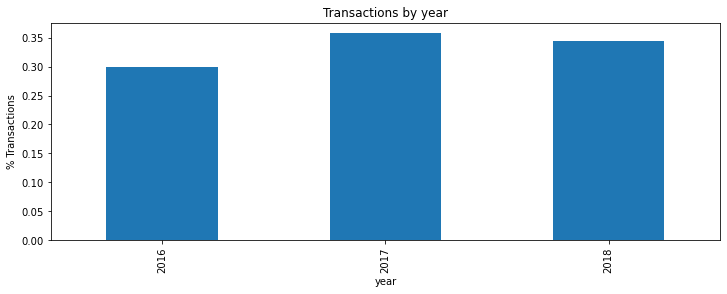

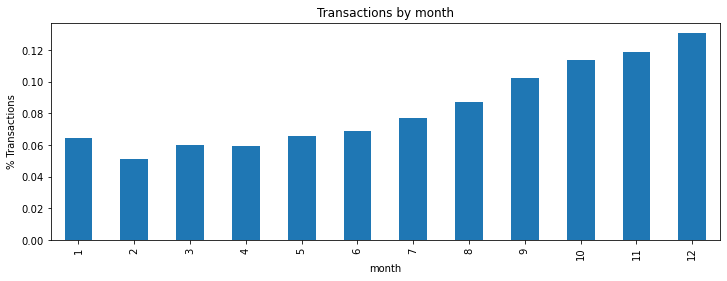

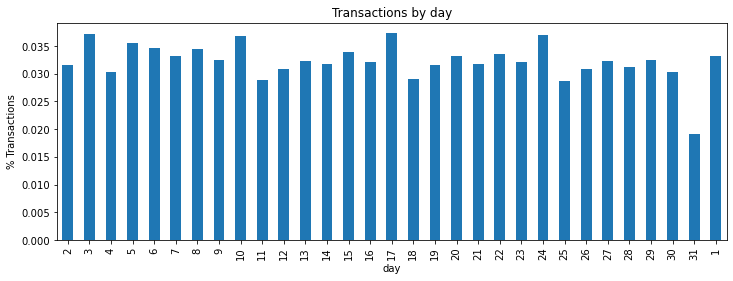

In [52]:
for var in temporal_var:
    
    plt.figure(figsize=(12,4))
    
    # plot transformed variable vs sale price
    df[var].value_counts(normalize = True, sort = False).plot(
    kind="bar",
    xlabel=f"{var}",
    ylabel="% Transactions",
    title=f"Transactions by {var}"
    )
                
    plt.show()

Notes:

1. The most number of transactions happened in 2017 followed by 2018 and then 2016. However also not that we do not have the data of Janauary of 2016.

2. For the whole period (3 years), more transactions happened in the ending-year months i.e., september-december.  

3. Transactions by day do not give much information

### Further Data Analysis

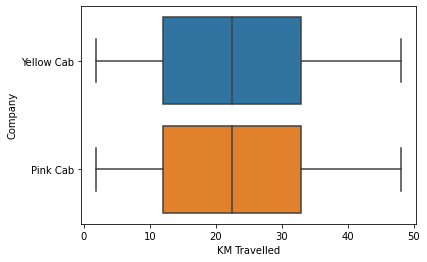

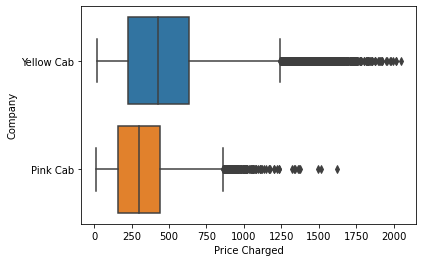

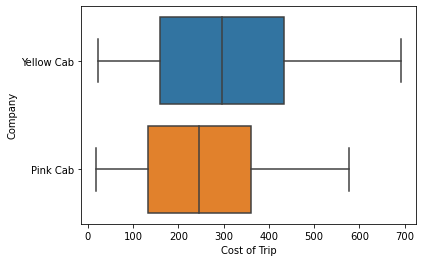

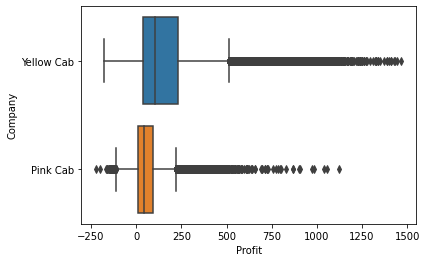

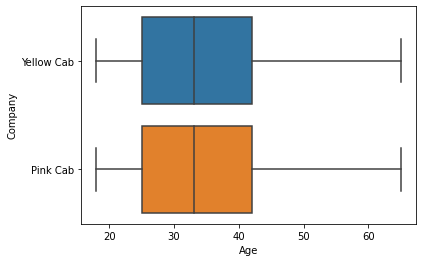

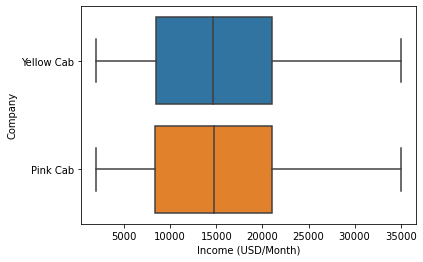

In [53]:
for var in continuous_var:
    sns.boxplot(data = df, y = 'Company', x = var, dodge=False)
    plt.show()

Points to be noted:

1. No difference between both companies when it comes to KM travelled by the passengers. 

2. Yellow cab charged more price, have higher cost and higher profit than Pink cab. This will be investigated further in Profit(loss) Analysis section. 

3. There is no difference in the ages and income of the people who choses these two cabs. 

4. There are negative profit values which means there are losses incurred by the cabs for some transactions. We wll go into detail later in Profit(loss) Analysis Section.

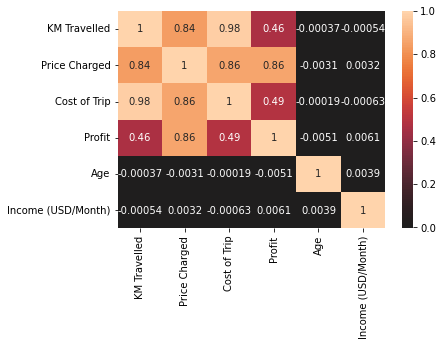

In [54]:
sns.heatmap(df[continuous_var].corr(), annot = True, center = 0);

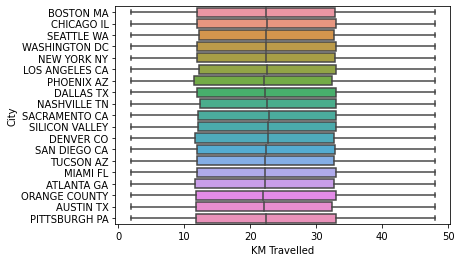

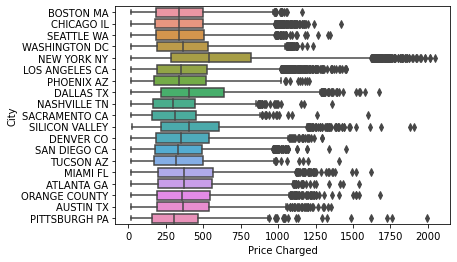

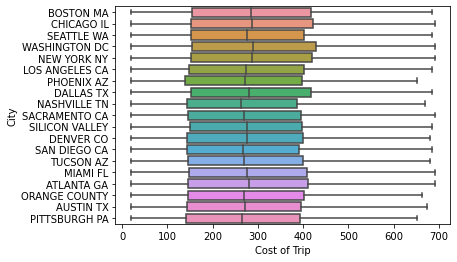

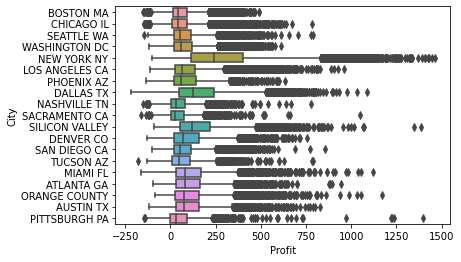

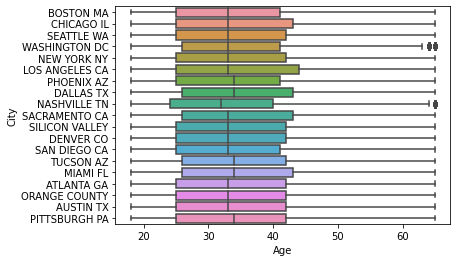

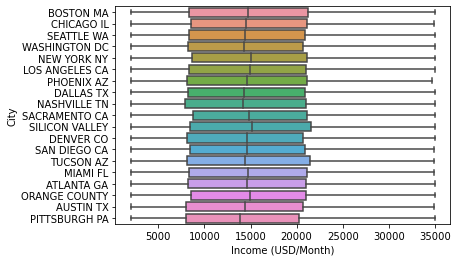

In [55]:
for var in continuous_var:
    sns.boxplot(data = df, y = 'City', x = var, dodge=False)
    plt.show()

Points to be noted:
    

Price Charged in New York is much greater than other cities followed by Dallas and Silicon Valley. Profit follows the similar pattern. 

New york and washington DC have a little higher cost than other cities. But the difference is not very big.



#### Create masks for both companies and compare

In [56]:
mask_yellow = df["Company"] == "Yellow Cab"
mask_pink = df["Company"] == "Pink Cab"

In [57]:
df_y = df[mask_yellow]
df_p = df[mask_pink]

In [58]:
df_y.shape

(274681, 19)

In [59]:
df_p.shape

(84711, 19)

In [60]:
df_y

Transaction ID Date of Travel  year  month  day     Company  \
12812         10000429     2016-01-02  2016      1    2  Yellow Cab   
43828         10000525     2016-01-02  2016      1    2  Yellow Cab   
297325        10001234     2016-01-02  2016      1    2  Yellow Cab   
316639        10001311     2016-01-02  2016      1    2  Yellow Cab   
171893        10000927     2016-01-02  2016      1    2  Yellow Cab   
...                ...            ...   ...    ...  ...         ...   
345087        10436616     2018-12-31  2018     12   31  Yellow Cab   
76324         10438162     2018-12-31  2018     12   31  Yellow Cab   
342991        10439934     2018-12-31  2018     12   31  Yellow Cab   
325663        10436500     2018-12-31  2018     12   31  Yellow Cab   
87418         10434637     2018-12-31  2018     12   31  Yellow Cab   

                 City  Population   Users  Users/Population  KM Travelled  \
12812       BOSTON MA      248968   80021          0.321411         15.15   
43828      CHICAGO IL     1955130  164468          0.084121          2.18   
297325     SEATTLE WA      671238   25063          0.037338         39.60   
316639  WASHINGTON DC      418859  127001          0.303207         34.65   
171893    NEW YORK NY     8405837  302149          0.035945         34.56   
...               ...         ...     ...               ...           ...   
345087  WASHINGTON DC      418859  127001          0.303207         13.92   
76324      CHICAGO IL     1955130  164468          0.084121         34.72   
342991  WASHINGTON DC      418859  127001          0.303207         38.11   
325663  WASHINGTON DC      418859  127001          0.303207         11.00   
87418      CHICAGO IL     1955130  164468          0.084121          3.36   

        Price Charged  Cost of Trip    Profit  Customer ID Payment_Mode  \
12812          342.62      205.4340  137.1860        57474         Card   
43828           51.47       26.4216   25.0484         4551         Cash   
297325        1119.67      541.7280  577.9420        38146         Cash   
316639         707.94      474.0120  233.9280        53048         Card   
171893        1121.11      485.2224  635.8876         1808         Cash   
...               ...           ...       ...          ...          ...   
345087         204.55      178.7328   25.8172        52846         Cash   
76324          472.05      433.3056   38.7444         4263         Card   
342991         510.48      544.2108  -33.7308        53878         Card   
325663         166.49      132.0000   34.4900        53140         Card   
87418           44.86       43.9488    0.9112         5926         Card   

        Gender  Age  Income (USD/Month)  
12812     Male   34               16558  
43828     Male   19                6316  
297325    Male   36                6577  
316639    Male   23               31566  
171893    Male   59               18999  
...        ...  ...                 ...  
345087    Male   35               15905  
76324     Male   36               19488  
342991  Female   27               11610  
325663  Female   40                7870  
87418     Male   58               31841  

[274681 rows x 19 columns]

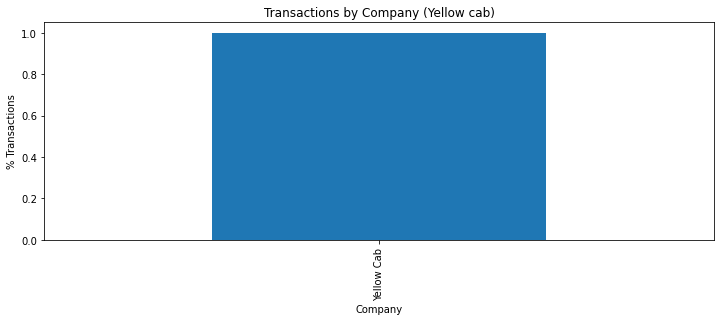

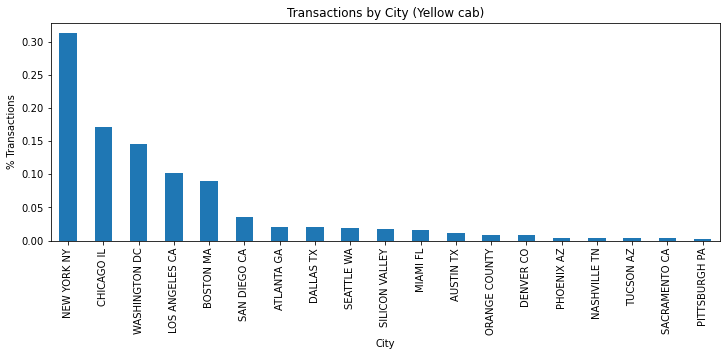

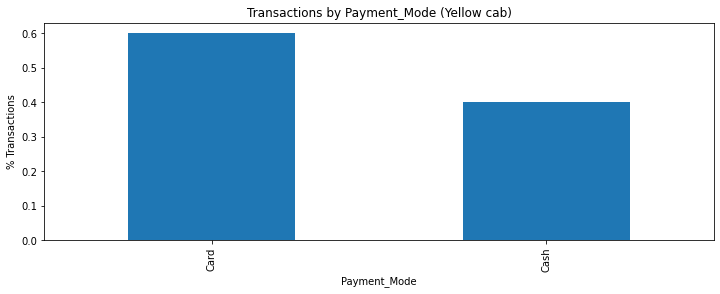

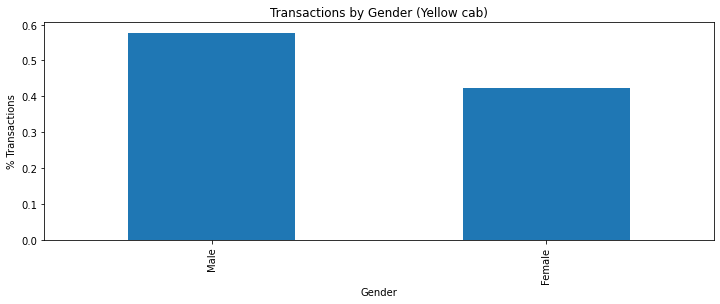

In [61]:
for var in categorical_var:
    
    plt.figure(figsize=(12,4))
    
    # plot transformed variable vs sale price
    df_y[var].value_counts(normalize = True).plot(
    kind="bar",
    xlabel=f"{var}",
    ylabel="% Transactions",
    title=f"Transactions by {var} (Yellow cab)"
    )
                
    plt.show()

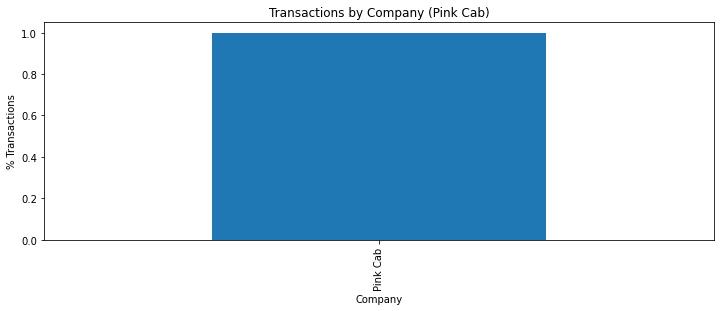

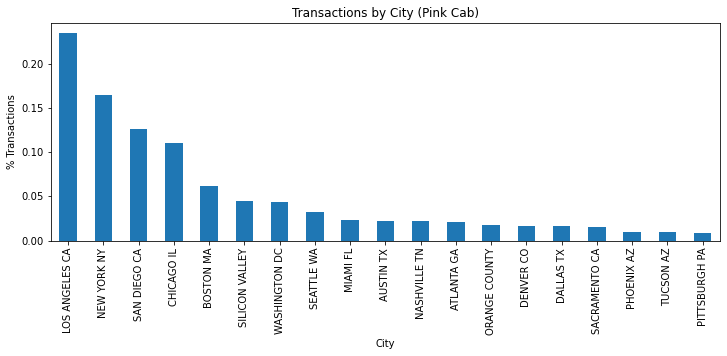

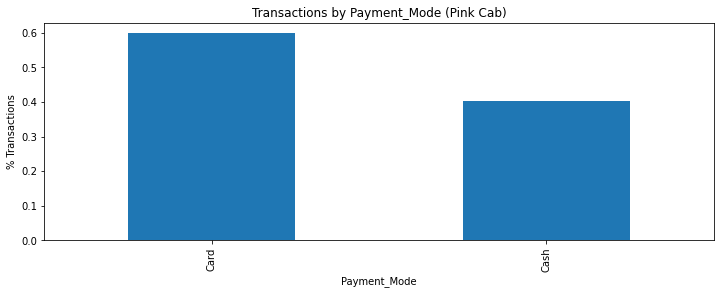

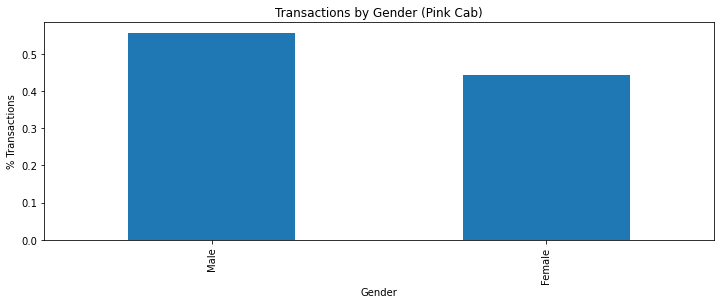

In [62]:
for var in categorical_var:
    
    plt.figure(figsize=(12,4))
    
    # plot transformed variable vs sale price
    df_p[var].value_counts(normalize = True).plot(
    kind="bar",
    xlabel=f"{var}",
    ylabel="% Transactions",
    title=f"Transactions by {var} (Pink Cab)"
    )
                
    plt.show()

Points to be noted:

Nework chicago washington are the places with most transactions for the yellow cab. On the other hand, for pink cab, top 3 places of transactions are Los Angeles, Newyork and San Diego. 

There is no difference between two cab companies when it comes to gender or payment mode. 



## Demand Analysis

### Daily Demand Analysis

In [63]:
transactions_daily = df.groupby(['Date of Travel', 'Company']).size().reset_index().rename(columns = {0 : 'Count'})

transactions_daily

Date of Travel     Company  Count
0        2016-01-02    Pink Cab     41
1        2016-01-02  Yellow Cab    140
2        2016-01-03    Pink Cab     52
3        2016-01-03  Yellow Cab    126
4        2016-01-04    Pink Cab      4
...             ...         ...    ...
2185     2018-12-29  Yellow Cab    630
2186     2018-12-30    Pink Cab     56
2187     2018-12-30  Yellow Cab    201
2188     2018-12-31    Pink Cab     58
2189     2018-12-31  Yellow Cab    198

[2190 rows x 3 columns]

In [64]:
#Assigning Colors for companies
palette = ['#d965a4', '#ffc400']

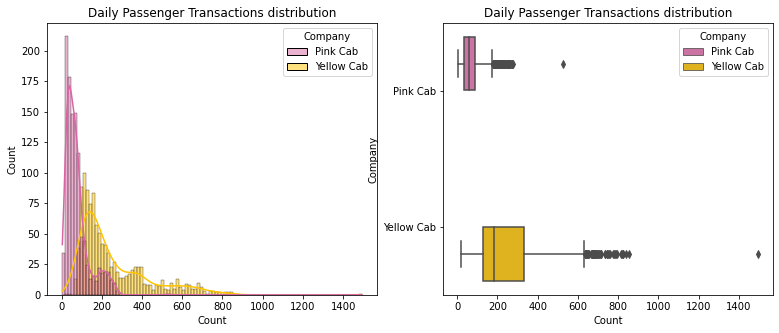

In [65]:
fig, ax = plt.subplots(1,2, figsize = (13,5))
sns.histplot(x = 'Count', hue = 'Company', data = transactions_daily, kde = True, palette = palette, 
             bins = 100, ax = ax[0]).set_title("Daily Passenger Transactions distribution");

sns.boxplot(x = 'Count', y = 'Company', data = transactions_daily, hue = 'Company', palette = palette, 
            ax = ax[1]).set_title("Daily Passenger Transactions distribution");

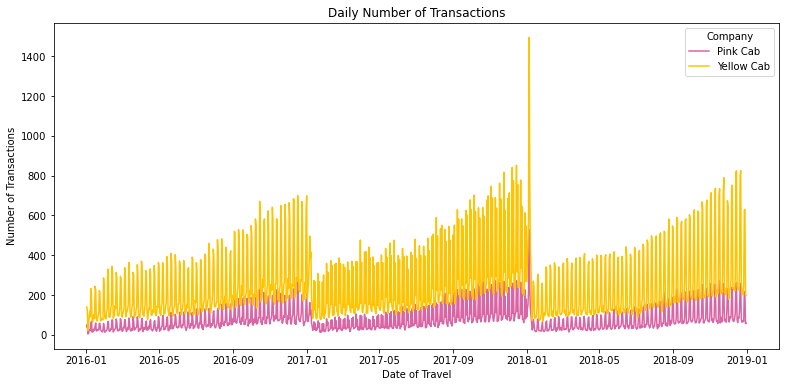

In [66]:
plt.figure(figsize = (13,6))
sns.lineplot(x = 'Date of Travel', y = 'Count', data = transactions_daily, hue = 'Company', 
             palette = palette);
plt.title('Daily Number of Transactions');
plt.xlabel('Date of Travel');
plt.ylabel('Number of Transactions');

The graph shows the daily transactions made by yellow and pink cab for the whole period. There is a clear seasonality for both companies and they follow similar pattern.

There is a clear upward trend on monthly level. On new year, the daily transactions dips down to the lowest again. But on a yearly level, the trend seems to be almost uniform.

Yellow Cab makes a lot more transaction on any given day compared to Pink Cab

The highest reported trips for both Cab companies was on 5th of January, 2018.

Let's look closely into number of trips during the 5th January 2018

In [67]:
transactions_city = df.groupby(['Date of Travel', 'City', 'Company']).size().reset_index().\
                                                            rename(columns = {0 : 'Count'})

transactions_city

Date of Travel            City     Company  Count
0         2016-01-02      ATLANTA GA    Pink Cab      1
1         2016-01-02      ATLANTA GA  Yellow Cab      4
2         2016-01-02       BOSTON MA    Pink Cab      2
3         2016-01-02       BOSTON MA  Yellow Cab      8
4         2016-01-02      CHICAGO IL    Pink Cab      7
...              ...             ...         ...    ...
32840     2018-12-31  SILICON VALLEY  Yellow Cab      4
32841     2018-12-31       TUCSON AZ    Pink Cab      1
32842     2018-12-31       TUCSON AZ  Yellow Cab      2
32843     2018-12-31   WASHINGTON DC    Pink Cab      1
32844     2018-12-31   WASHINGTON DC  Yellow Cab     29

[32845 rows x 4 columns]

In [68]:
transactions_city.loc[transactions_city['Date of Travel'] == "2018-01-05"]

Date of Travel            City     Company  Count
21993     2018-01-05      ATLANTA GA    Pink Cab     11
21994     2018-01-05      ATLANTA GA  Yellow Cab     41
21995     2018-01-05       AUSTIN TX    Pink Cab     14
21996     2018-01-05       AUSTIN TX  Yellow Cab     16
21997     2018-01-05       BOSTON MA    Pink Cab     32
21998     2018-01-05       BOSTON MA  Yellow Cab     91
21999     2018-01-05      CHICAGO IL    Pink Cab     60
22000     2018-01-05      CHICAGO IL  Yellow Cab    246
22001     2018-01-05       DALLAS TX    Pink Cab     14
22002     2018-01-05       DALLAS TX  Yellow Cab     40
22003     2018-01-05       DENVER CO    Pink Cab      9
22004     2018-01-05       DENVER CO  Yellow Cab     24
22005     2018-01-05  LOS ANGELES CA    Pink Cab    118
22006     2018-01-05  LOS ANGELES CA  Yellow Cab    157
22007     2018-01-05        MIAMI FL    Pink Cab     10
22008     2018-01-05        MIAMI FL  Yellow Cab     29
22009     2018-01-05    NASHVILLE TN    Pink Cab      8
22010     2018-01-05    NASHVILLE TN  Yellow Cab      7
22011     2018-01-05     NEW YORK NY    Pink Cab     74
22012     2018-01-05     NEW YORK NY  Yellow Cab    503
22013     2018-01-05   ORANGE COUNTY    Pink Cab     13
22014     2018-01-05   ORANGE COUNTY  Yellow Cab     18
22015     2018-01-05      PHOENIX AZ    Pink Cab      7
22016     2018-01-05      PHOENIX AZ  Yellow Cab      9
22017     2018-01-05   PITTSBURGH PA    Pink Cab      2
22018     2018-01-05   PITTSBURGH PA  Yellow Cab      2
22019     2018-01-05   SACRAMENTO CA    Pink Cab     16
22020     2018-01-05   SACRAMENTO CA  Yellow Cab      3
22021     2018-01-05    SAN DIEGO CA    Pink Cab     69
22022     2018-01-05    SAN DIEGO CA  Yellow Cab     51
22023     2018-01-05      SEATTLE WA    Pink Cab     15
22024     2018-01-05      SEATTLE WA  Yellow Cab     30
22025     2018-01-05  SILICON VALLEY    Pink Cab     27
22026     2018-01-05  SILICON VALLEY  Yellow Cab     30
22027     2018-01-05       TUCSON AZ    Pink Cab      5
22028     2018-01-05       TUCSON AZ  Yellow Cab      3
22029     2018-01-05   WASHINGTON DC    Pink Cab     24
22030     2018-01-05   WASHINGTON DC  Yellow Cab    194

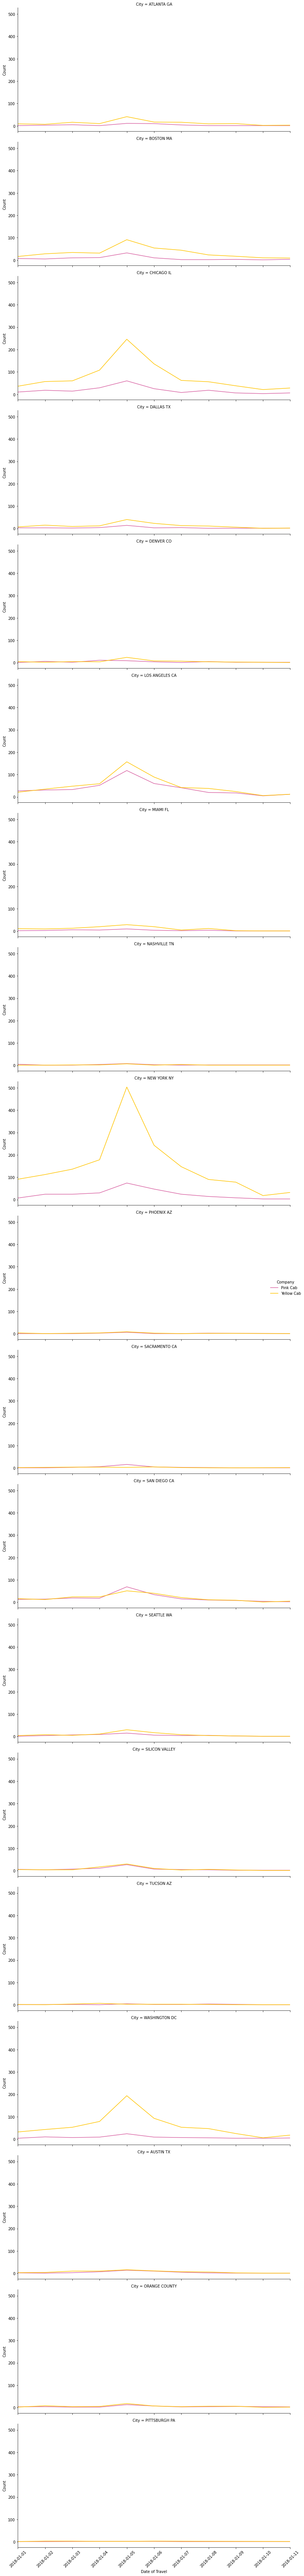

In [69]:
sns.relplot(x = 'Date of Travel', y = 'Count', row = 'City', hue = 'Company', 
            palette = palette, data = transactions_city, kind = 'line', aspect = 2);

plt.xlim(17532, 17542);
plt.xticks(rotation = 45);
plt.tight_layout();

In [70]:
df.head()

Transaction ID Date of Travel  year  month  day     Company  \
12812         10000429     2016-01-02  2016      1    2  Yellow Cab   
43828         10000525     2016-01-02  2016      1    2  Yellow Cab   
297325        10001234     2016-01-02  2016      1    2  Yellow Cab   
316639        10001311     2016-01-02  2016      1    2  Yellow Cab   
171893        10000927     2016-01-02  2016      1    2  Yellow Cab   

                 City  Population   Users  Users/Population  KM Travelled  \
12812       BOSTON MA      248968   80021          0.321411         15.15   
43828      CHICAGO IL     1955130  164468          0.084121          2.18   
297325     SEATTLE WA      671238   25063          0.037338         39.60   
316639  WASHINGTON DC      418859  127001          0.303207         34.65   
171893    NEW YORK NY     8405837  302149          0.035945         34.56   

        Price Charged  Cost of Trip    Profit  Customer ID Payment_Mode  \
12812          342.62      205.4340  137.1860        57474         Card   
43828           51.47       26.4216   25.0484         4551         Cash   
297325        1119.67      541.7280  577.9420        38146         Cash   
316639         707.94      474.0120  233.9280        53048         Card   
171893        1121.11      485.2224  635.8876         1808         Cash   

       Gender  Age  Income (USD/Month)  
12812    Male   34               16558  
43828    Male   19                6316  
297325   Male   36                6577  
316639   Male   23               31566  
171893   Male   59               18999

In [71]:
df.loc[(df['Date of Travel'] == "2018-01-05") & (df["City"] == "NEW YORK NY")]

Transaction ID Date of Travel  year  month  day     Company  \
244303        10439136     2018-01-05  2018      1    5  Yellow Cab   
256470        10290311     2018-01-05  2018      1    5  Yellow Cab   
255828        10292529     2018-01-05  2018      1    5  Yellow Cab   
265806        10290322     2018-01-05  2018      1    5  Yellow Cab   
251766        10288531     2018-01-05  2018      1    5    Pink Cab   
...                ...            ...   ...    ...  ...         ...   
184593        10290666     2018-01-05  2018      1    5  Yellow Cab   
223747        10292391     2018-01-05  2018      1    5  Yellow Cab   
238498        10290461     2018-01-05  2018      1    5  Yellow Cab   
202894        10438700     2018-01-05  2018      1    5  Yellow Cab   
220296        10439027     2018-01-05  2018      1    5  Yellow Cab   

               City  Population   Users  Users/Population  KM Travelled  \
244303  NEW YORK NY     8405837  302149          0.035945         11.64   
256470  NEW YORK NY     8405837  302149          0.035945         41.40   
255828  NEW YORK NY     8405837  302149          0.035945         30.74   
265806  NEW YORK NY     8405837  302149          0.035945          5.35   
251766  NEW YORK NY     8405837  302149          0.035945         14.04   
...             ...         ...     ...               ...           ...   
184593  NEW YORK NY     8405837  302149          0.035945          4.68   
223747  NEW YORK NY     8405837  302149          0.035945         31.35   
238498  NEW YORK NY     8405837  302149          0.035945         17.46   
202894  NEW YORK NY     8405837  302149          0.035945         22.26   
220296  NEW YORK NY     8405837  302149          0.035945         37.10   

        Price Charged  Cost of Trip    Profit  Customer ID Payment_Mode  \
244303         224.42      139.6800   84.7400         2601         Cash   
256470        1191.74      501.7680  689.9720          132         Card   
255828         962.59      409.4568  553.1332         1710         Card   
265806         135.50       68.6940   66.8060         1441         Card   
251766         210.74      165.6720   45.0680         1764         Card   
...               ...           ...       ...          ...          ...   
184593         121.16       60.6528   60.5072          574         Card   
223747         859.51      432.6300  426.8800         1683         Card   
238498         441.07      251.4240  189.6460         2445         Cash   
202894         571.07      269.7912  301.2788          464         Cash   
220296         913.13      485.2680  427.8620          679         Card   

        Gender  Age  Income (USD/Month)  
244303    Male   35                8645  
256470    Male   33               22604  
255828    Male   27               16808  
265806    Male   58                3574  
251766    Male   24               29835  
...        ...  ...                 ...  
184593    Male   37               12420  
223747    Male   58                7086  
238498  Female   40               32527  
202894    Male   23                2734  
220296    Male   22                9621  

[577 rows x 19 columns]

577 Transactions happened in NEW York on 2018-01-05. What could be the reason for this?

After surfing on the internet, I came across an article by New York post which mentions heavy snowfall in New York which was not cleaned up by the authorities on time. On 5th January most of the bus stops were blocked with snow and the public transportation got affected due to this. This may explain the high cab transactions that day. 

### Monthly Demand Analysis 

In [72]:
transactions_monthly = df.groupby(["year", "month", "Company"]).size().reset_index().rename(columns = {0:"Count"})
transactions_monthly

year  month     Company  Count
0   2016      1    Pink Cab    927
1   2016      1  Yellow Cab   3719
2   2016      2    Pink Cab   1050
3   2016      2  Yellow Cab   4674
4   2016      3    Pink Cab   1231
..   ...    ...         ...    ...
67  2018     10  Yellow Cab   9727
68  2018     11    Pink Cab   3897
69  2018     11  Yellow Cab  11230
70  2018     12    Pink Cab   3800
71  2018     12  Yellow Cab  11766

[72 rows x 4 columns]

In [73]:
transactions_monthly['year_month'] = transactions_monthly['year'].astype('str') + "-" + transactions_monthly['month'].astype('str')
transactions_monthly

year  month     Company  Count year_month
0   2016      1    Pink Cab    927     2016-1
1   2016      1  Yellow Cab   3719     2016-1
2   2016      2    Pink Cab   1050     2016-2
3   2016      2  Yellow Cab   4674     2016-2
4   2016      3    Pink Cab   1231     2016-3
..   ...    ...         ...    ...        ...
67  2018     10  Yellow Cab   9727    2018-10
68  2018     11    Pink Cab   3897    2018-11
69  2018     11  Yellow Cab  11230    2018-11
70  2018     12    Pink Cab   3800    2018-12
71  2018     12  Yellow Cab  11766    2018-12

[72 rows x 5 columns]

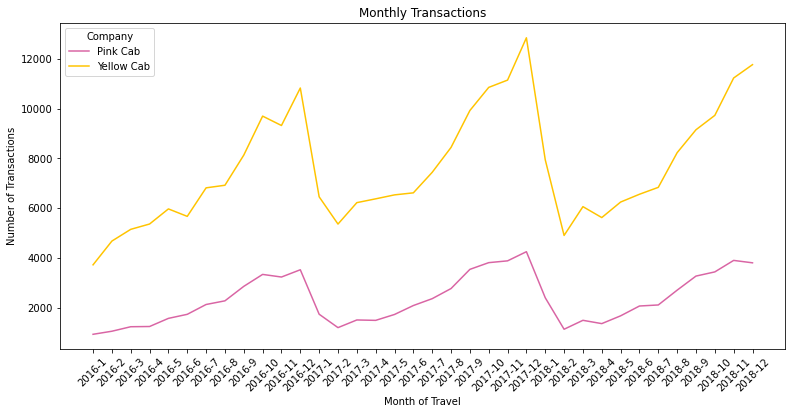

In [74]:
plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'year_month', y = 'Count', data = transactions_monthly, hue = 'Company', 
             palette = palette);

plt.xticks(rotation = 45)
plt.title('Monthly Transactions');
plt.xlabel('Month of Travel');
plt.ylabel('Number of Transactions');

#### Monthly Average Demand

In [75]:
mad=df.groupby(['Company','month'])['Transaction ID'].agg(['count'])
mad=mad.reset_index(level='month', col_level=1)
mad=mad.reset_index(level='Company', col_level=1)
mad = mad.sort_values(by='count', ascending= False )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


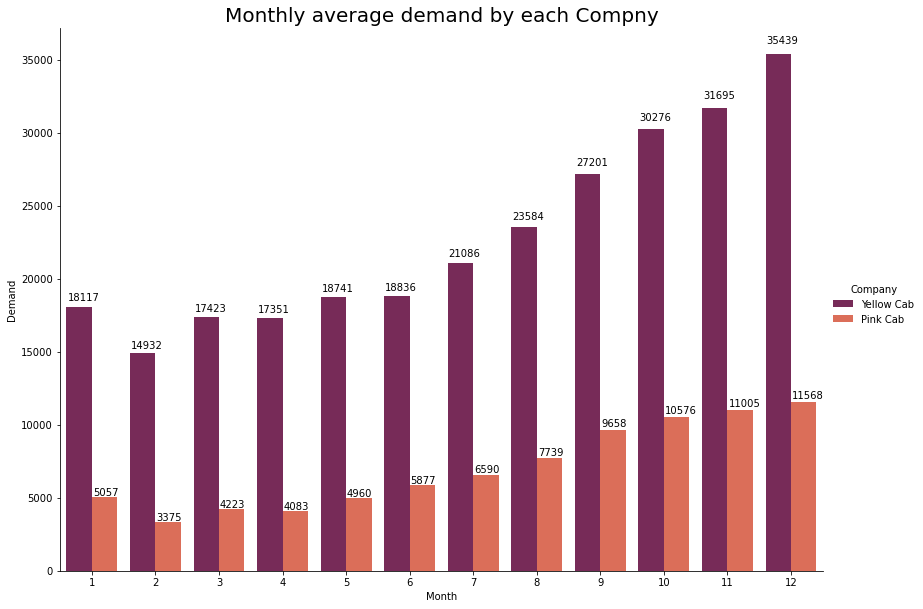

In [76]:
g=sns.catplot('month','count',data=mad,kind='bar',hue='Company',palette = 'rocket', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.title('Monthly average demand by each Compny',fontsize=20)
plt.ylabel('Demand')
plt.xlabel('Month')
plt.show()

We can clearly see that there is a seasonality from the monthly analysis. The number of transactions at the month of February is the lowest and the number of transactions at the month of December is the highest for all the years. For both Cab companies, there is a slight upward trend throughout the years.

#### Monthly demand analysis by city

In [77]:
transactions_city_monthly = df.groupby(['year', 'month', 'City', 'Company']).size().\
                                    reset_index().rename(columns = {0:'count'})

transactions_city_monthly['year_month'] = transactions_city_monthly['year'].astype('str') + "_" + \
                                                transactions_city_monthly['month'].astype('str')

transactions_city_monthly

year  month            City     Company  count year_month
0     2016      1      ATLANTA GA    Pink Cab     21     2016_1
1     2016      1      ATLANTA GA  Yellow Cab     85     2016_1
2     2016      1       AUSTIN TX    Pink Cab      7     2016_1
3     2016      1       AUSTIN TX  Yellow Cab     24     2016_1
4     2016      1       BOSTON MA    Pink Cab     72     2016_1
...    ...    ...             ...         ...    ...        ...
1363  2018     12  SILICON VALLEY  Yellow Cab    205    2018_12
1364  2018     12       TUCSON AZ    Pink Cab     29    2018_12
1365  2018     12       TUCSON AZ  Yellow Cab     50    2018_12
1366  2018     12   WASHINGTON DC    Pink Cab    188    2018_12
1367  2018     12   WASHINGTON DC  Yellow Cab   1500    2018_12

[1368 rows x 6 columns]

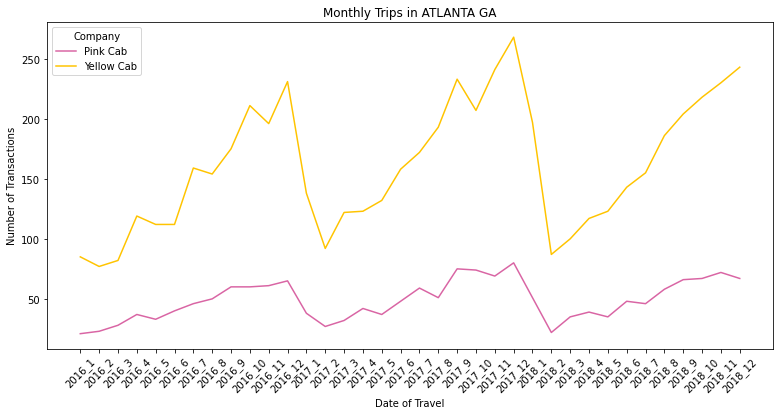

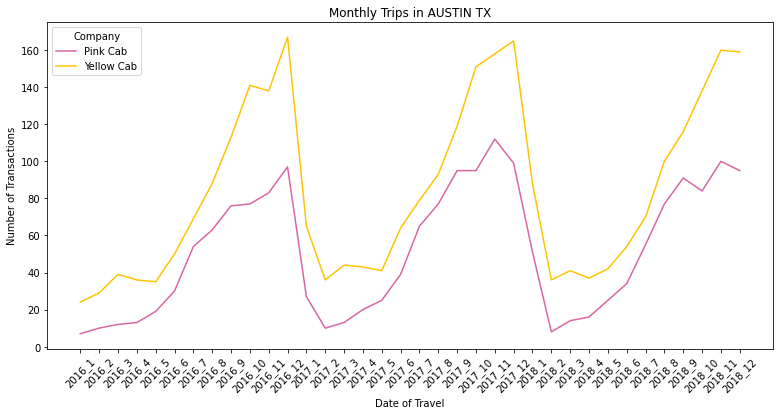

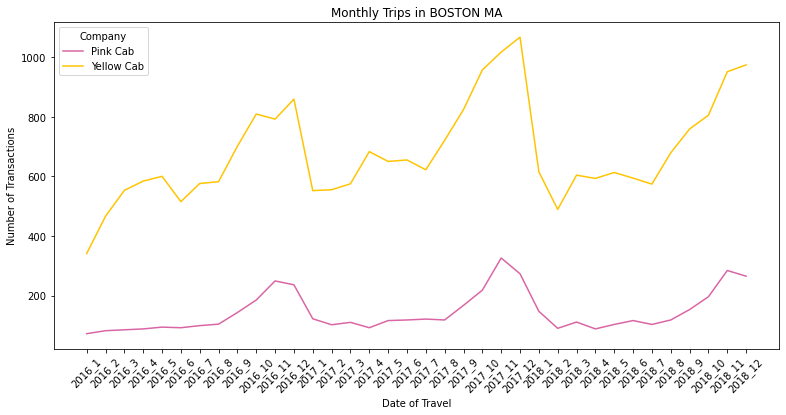

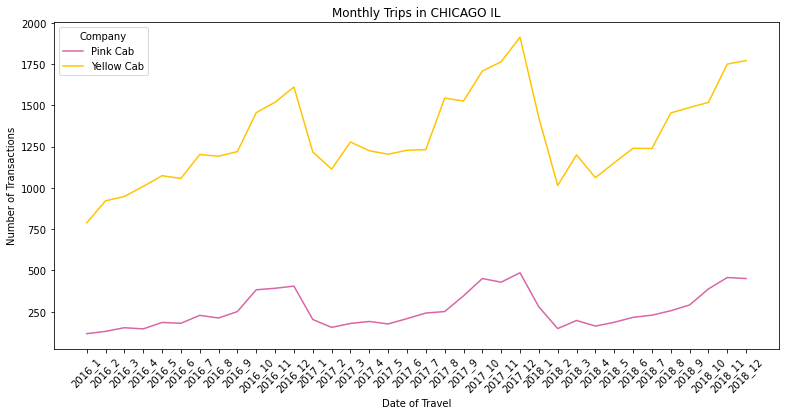

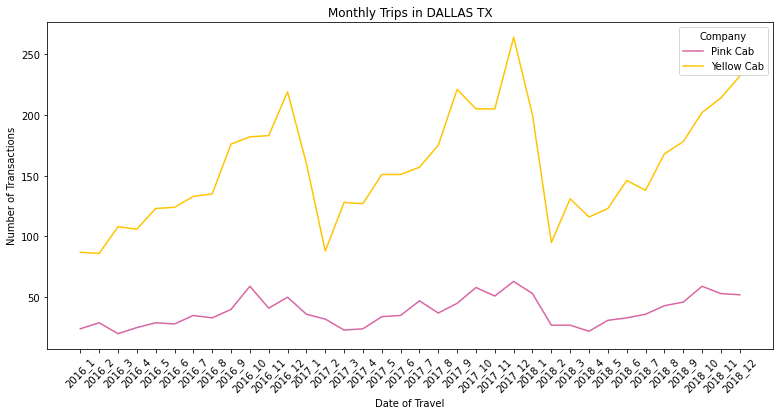

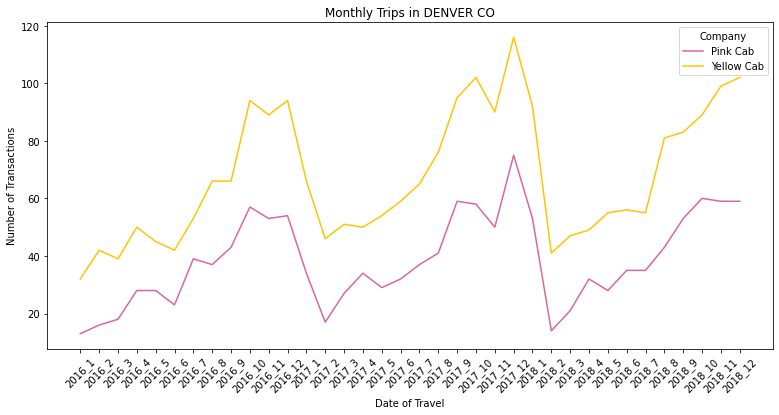

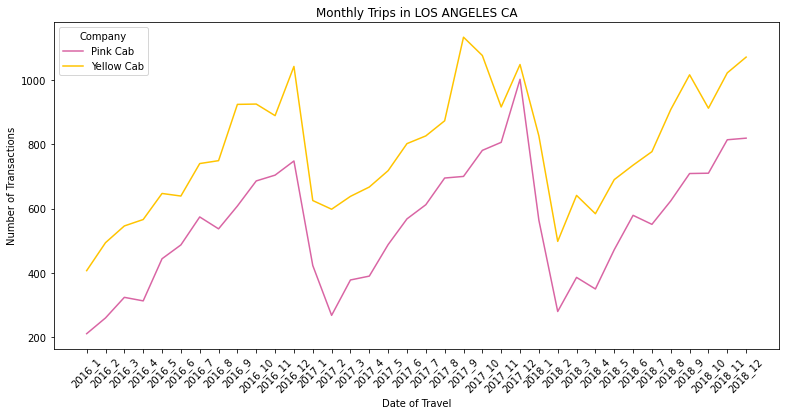

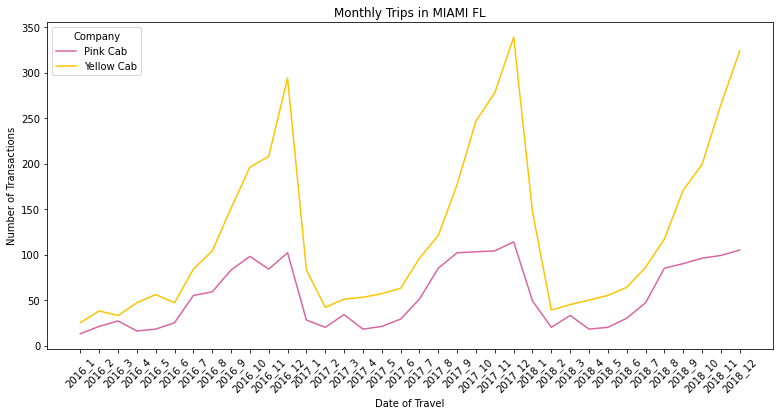

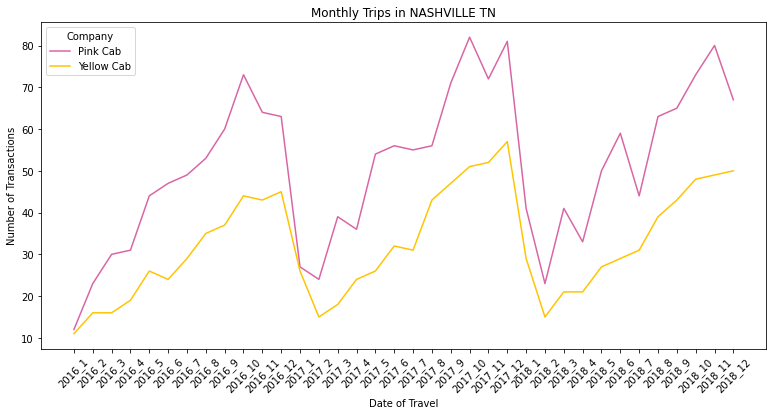

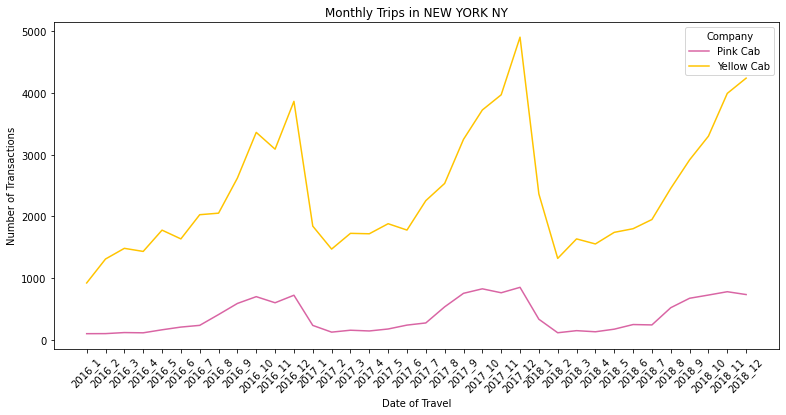

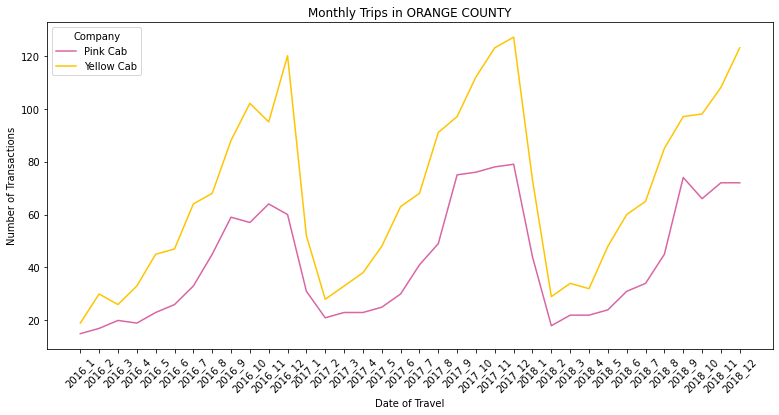

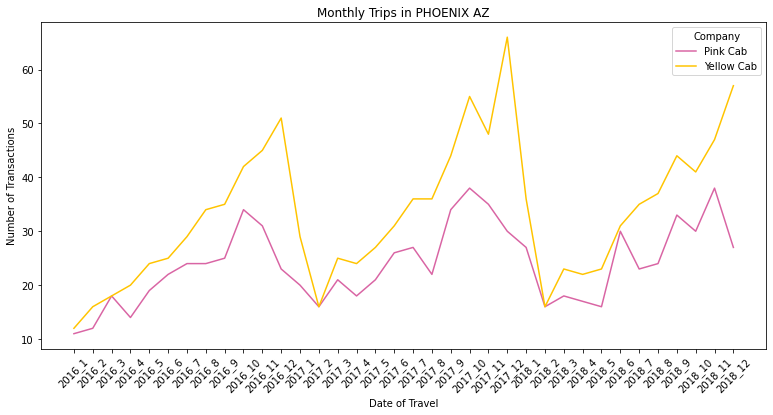

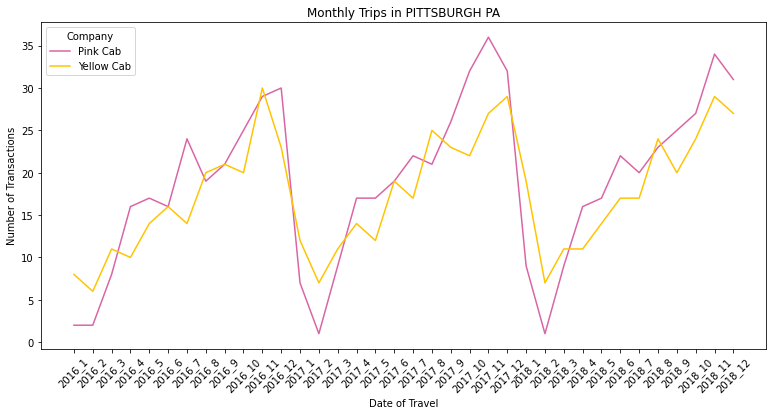

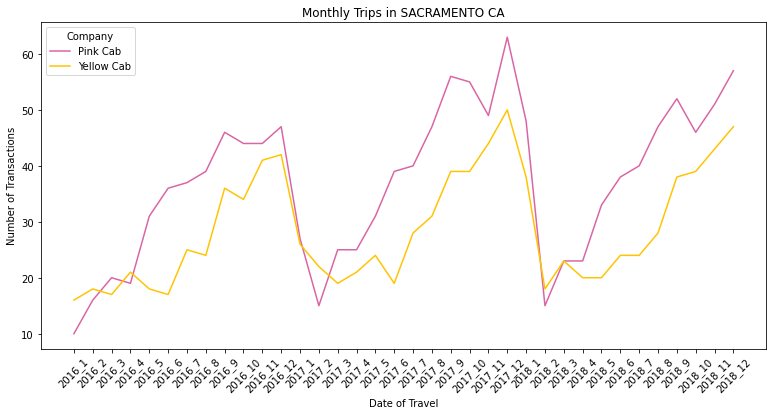

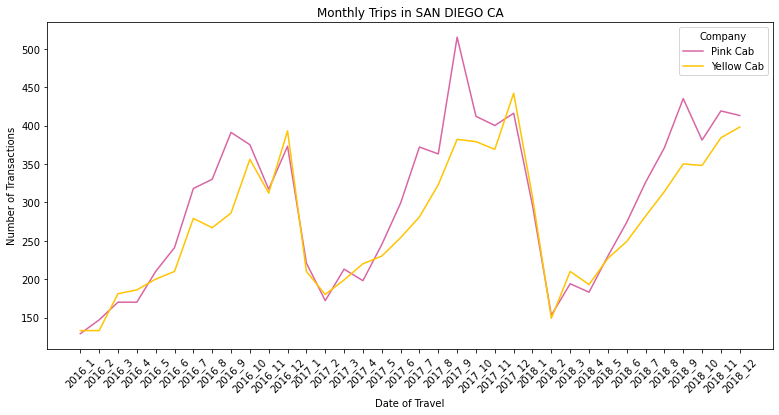

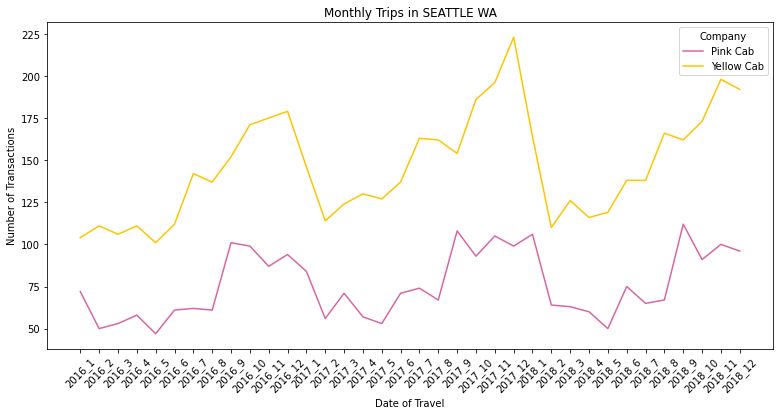

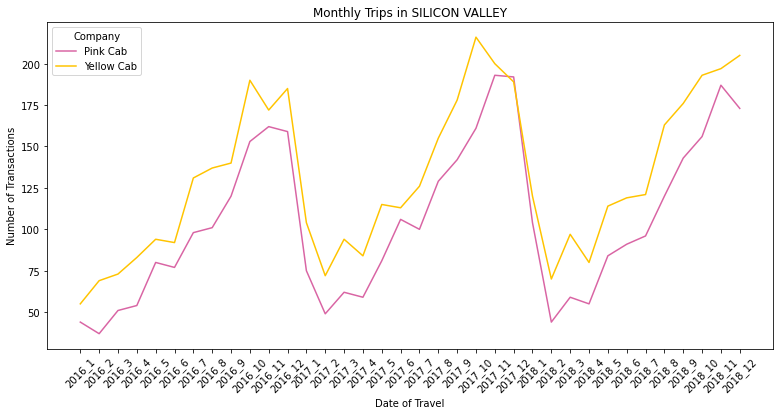

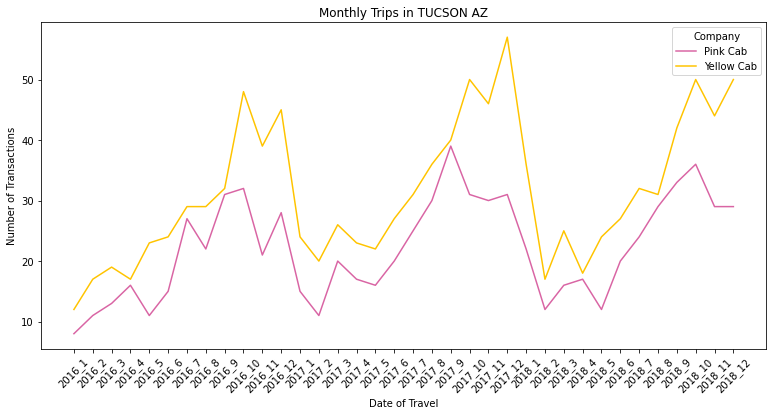

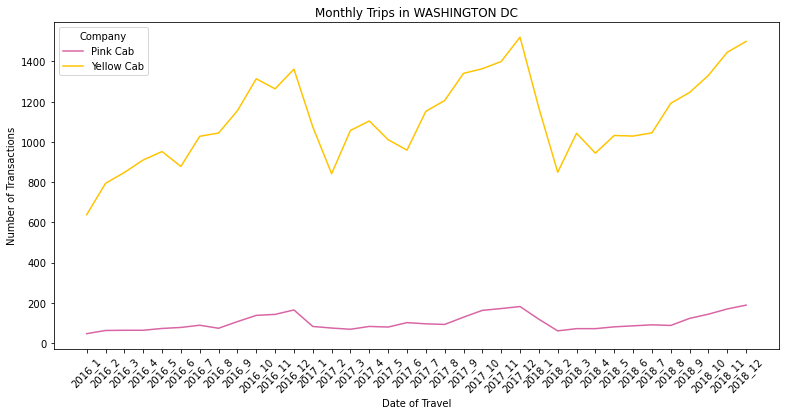

In [78]:
for i in transactions_city_monthly.City.unique():
    plt.figure(figsize = (13,6))
    temp_df = transactions_city_monthly.query(f"City == '{i}'")
    
    sns.lineplot(x = 'year_month', y = 'count', data = temp_df, hue = 'Company', 
                 palette = palette);

    plt.title(f'Monthly Trips in {i}');
    plt.xlabel('Date of Travel');
    plt.ylabel('Number of Transactions');
    plt.xticks(rotation = 45)

In [79]:
demand_city = df.groupby(["Company","City"])["Transaction ID"].agg(["count"])
demand_city.columns= ["Transactions"]
demand_city=demand_city.reset_index(level="City")
demand_city=demand_city.reset_index(level="Company")
demand_city.head()

Company        City  Transactions
0  Pink Cab  ATLANTA GA          1762
1  Pink Cab   AUSTIN TX          1868
2  Pink Cab   BOSTON MA          5186
3  Pink Cab  CHICAGO IL          9361
4  Pink Cab   DALLAS TX          1380

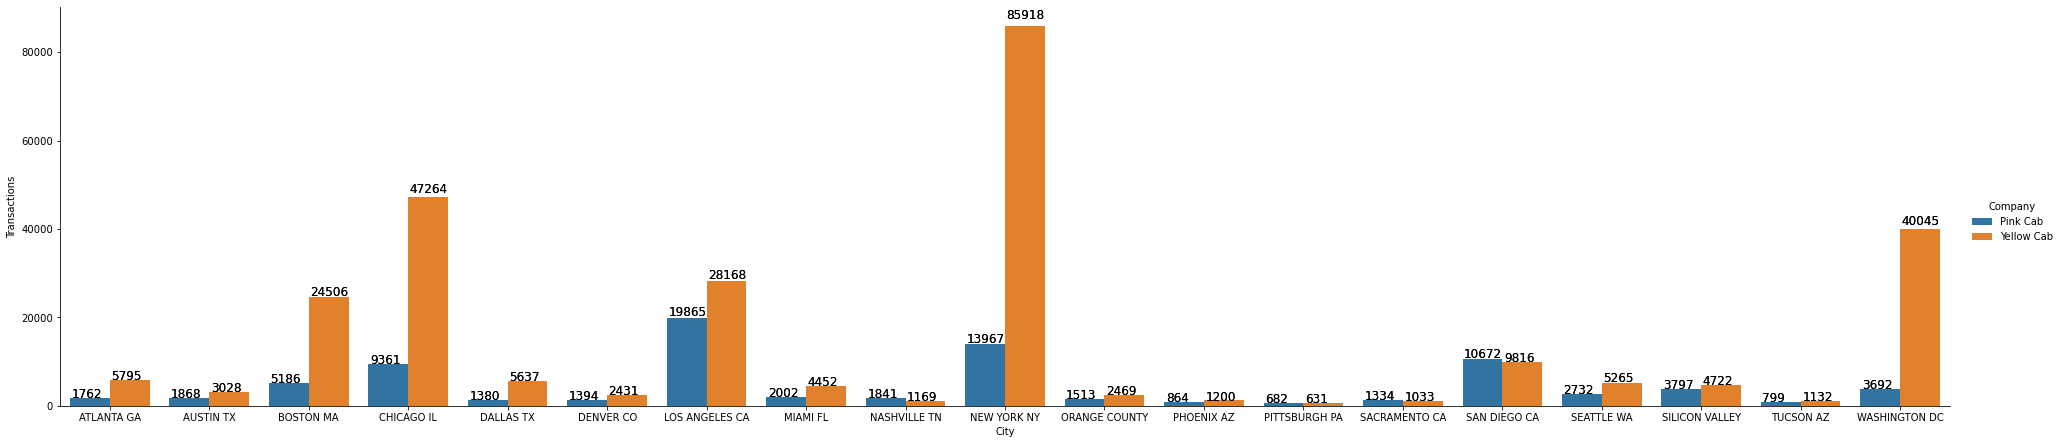

In [80]:
graph = sns.catplot(x='City', y='Transactions', hue='Company', data=demand_city, kind='bar', height=6.27, aspect=18.7/4.27)
ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.show()

Pitsburgh, San Diego, Sacremento and Nashville are the only 4 places where pink cab has more transactions over the period than yellow cab. All the other cities, yellow cab has the majority.

#### Yearly

In [81]:
da_yearly = df.groupby(["Company","year"])["Transaction ID"].agg(["count"])
da_yearly.columns= ["Transactions"]
da_yearly=da_yearly.reset_index(level="year")
da_yearly=da_yearly.reset_index(level="Company")
da_yearly

Company  year  Transactions
0    Pink Cab  2016         25080
1    Pink Cab  2017         30321
2    Pink Cab  2018         29310
3  Yellow Cab  2016         82239
4  Yellow Cab  2017         98189
5  Yellow Cab  2018         94253

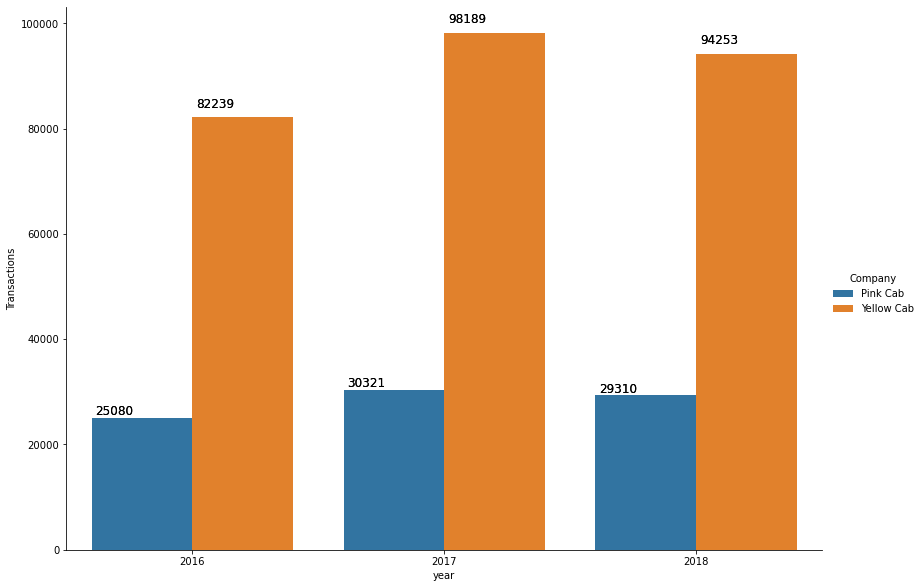

In [82]:
graph = sns.catplot(x='year', y='Transactions', hue='Company', data=da_yearly, kind='bar', height=8.27, aspect=11.7/8.27)
ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.show()

2016 has a little lower transactions than 2017 and 2018 for both companies.This can be explained by the fact that the data provided does not take into account January,2016 transactions. 
There is a small decrease in transactions from 2017 to 2018.  

### Demand Analysis by Age groups

**Hypothesis: Is some specific age group taking taxi more? Is there a certain age group which prefer one of the company?**

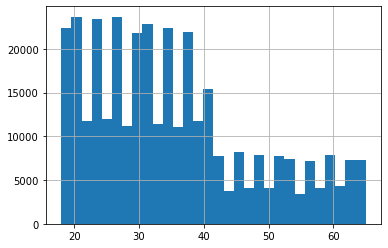

In [83]:
df["Age"].hist(bins=30)
plt.show()

Age variable shows a two phase uniform distribution which tells us that the customers of different ages taking the taxi have equal probability for age less than 40. And people with age greater than 40 have lower transactions but have equal probability of taking the taxi.

In [84]:
df["Age"].min()

18

In [85]:
df["Age"].max()

65

Let's divide the dataset in four age groups.

Group 1: 18-25

Group 2: 26-39

Group 3: 40-59

Group 4: 60+ 

In [86]:
group_1 = df[(df["Age"]>=18) & (df["Age"]<26)]
group_2 = df[(df["Age"]>=26) & (df["Age"]<40)]
group_3 = df[(df["Age"]>=40) & (df["Age"]<60)]
group_4 = df[(df["Age"]>=60)]

In [87]:
# Creating a dataset that displays Company, year, Total Customers and Class

# ytc stands for yearly transactions by company
# ytc_group1 stands for yearly transactions by company for group 1

ytc_group1 = group_1.groupby(['Company','year'])['Customer ID'].agg(['count'])
ytc_group1.columns= ["Total Customers"]
ytc_group1=ytc_group1.reset_index(level="year", col_level=1)
ytc_group1=ytc_group1.reset_index(level="Company", col_level=1)
ytc_group1["Class"] = "18-25"

ytc_group2 = group_2.groupby(['Company','year'])['Customer ID'].agg(['count'])
ytc_group2.columns= ["Total Customers"]
ytc_group2=ytc_group2.reset_index(level="year", col_level=1)
ytc_group2=ytc_group2.reset_index(level="Company", col_level=1)
ytc_group2["Class"] = "26-39"

ytc_group3 = group_3.groupby(['Company','year'])['Customer ID'].agg(['count'])
ytc_group3.columns= ["Total Customers"]
ytc_group3=ytc_group3.reset_index(level="year", col_level=1)
ytc_group3=ytc_group3.reset_index(level="Company", col_level=1)
ytc_group3["Class"] = "40-59"

ytc_group4 = group_4.groupby(['Company','year'])['Customer ID'].agg(['count'])
ytc_group4.columns= ["Total Customers"]
ytc_group4=ytc_group4.reset_index(level="year", col_level=1)
ytc_group4=ytc_group4.reset_index(level="Company", col_level=1)
ytc_group4["Class"] = "60+"

agegroup=pd.concat([ytc_group1,ytc_group2,ytc_group3,ytc_group4])

In [88]:
agegroup.head(10)

Company  year  Total Customers  Class
0    Pink Cab  2016             6450  18-25
1    Pink Cab  2017             8066  18-25
2    Pink Cab  2018             7604  18-25
3  Yellow Cab  2016            21183  18-25
4  Yellow Cab  2017            25548  18-25
5  Yellow Cab  2018            24493  18-25
0    Pink Cab  2016            11085  26-39
1    Pink Cab  2017            13252  26-39
2    Pink Cab  2018            12918  26-39
3  Yellow Cab  2016            36476  26-39

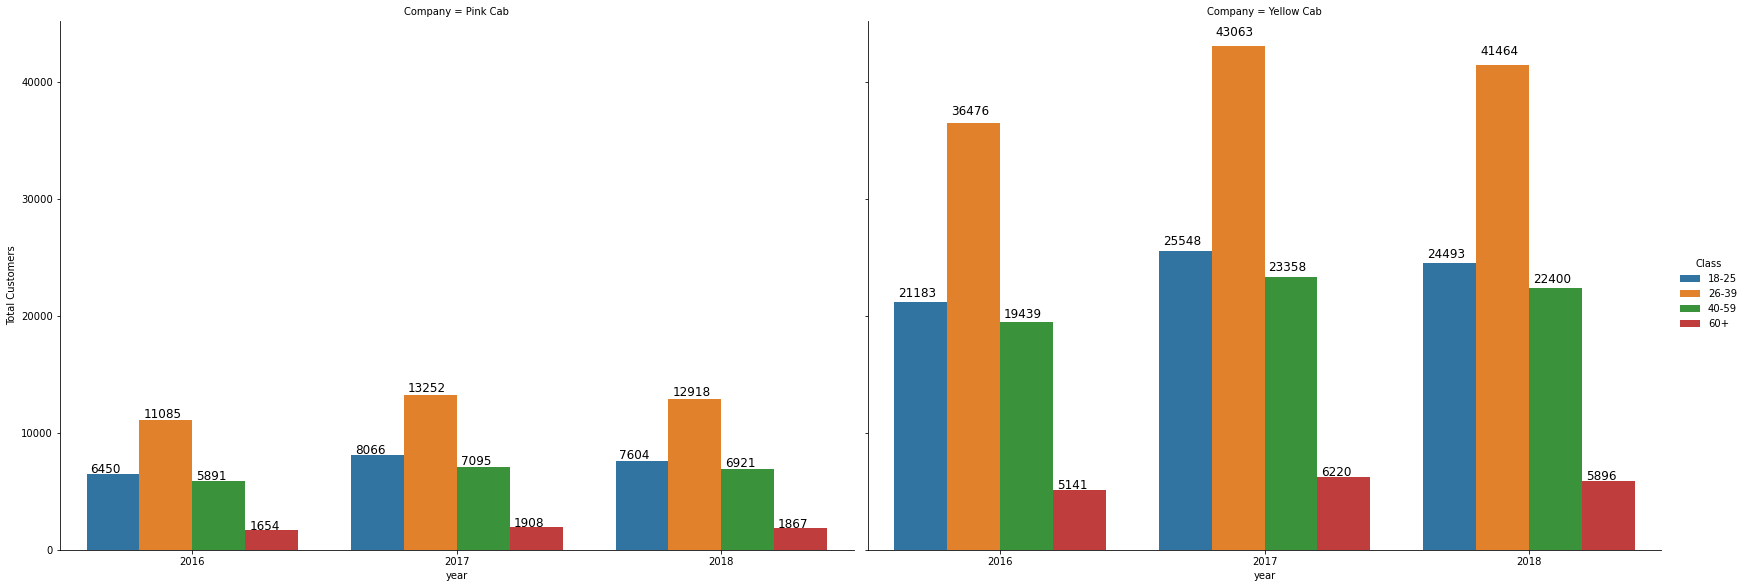

In [89]:
graph = sns.catplot(x='year', y='Total Customers', col= 'Company', hue='Class', data=agegroup, kind='bar', height=8.27, aspect=11.7/8.27)

ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
ax = graph.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.show()

We can see the same pattern for both the companies.
26-39 years old age group taking the most cabs in all 3 years and the senior citizens taking the least. 

### Demand Analysis by Customer Income

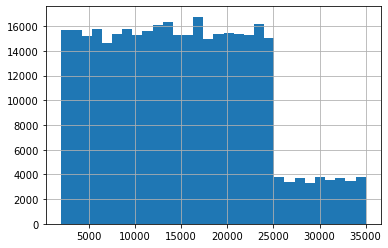

In [90]:
df["Income (USD/Month)"].hist(bins=30)
plt.show()

Income variable (like age variable) shows a two phase uniform distribution which tells us that the customers of different incomes taking the taxi have equal probability for income less than 25000. And people with income greater than 25000 have lower transactions but have equal probability of taking the taxi.

We need to investigate if the income of customers affect the number of times they take taxi.

In [91]:
# Creating a dataset customer id, customer's income and total number of times the customer has made the transactions.

df_customer_income_transaction = df.groupby(['Customer ID', "Income (USD/Month)"]).size().\
                                                reset_index().rename(columns = {0:'count'})

df_customer_income_transaction

Customer ID  Income (USD/Month)  count
0                1               16359     29
1                2               12069     40
2                3               12968     46
3                4               13803     26
4                5                9965     31
...            ...                 ...    ...
46143        59996               16634      4
46144        59997               22352     10
46145        59998                5678      9
46146        59999               24577      8
46147        60000               20303     18

[46148 rows x 3 columns]

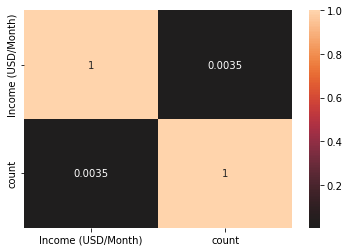

In [92]:
sns.heatmap(df_customer_income_transaction.iloc[:,1:].corr('spearman'), annot = True, center = 0);

It seems that there is no relation between the number of times a customer choses a cab and their income. 
Lets investigate if there are customers belonging to a particular income class who take cab more often. Lets have a look at income classes by binning for more insight

In [93]:
df["Income (USD/Month)"].max()

35000

In [94]:
#Binning income groups

bins = [0, 4350.5, 13050.5, 35000.5]
label = ['low income', 'middle income', 'upper income']

df["Income groups"] = pd.cut(df["Income (USD/Month)"], bins = bins, labels = label)

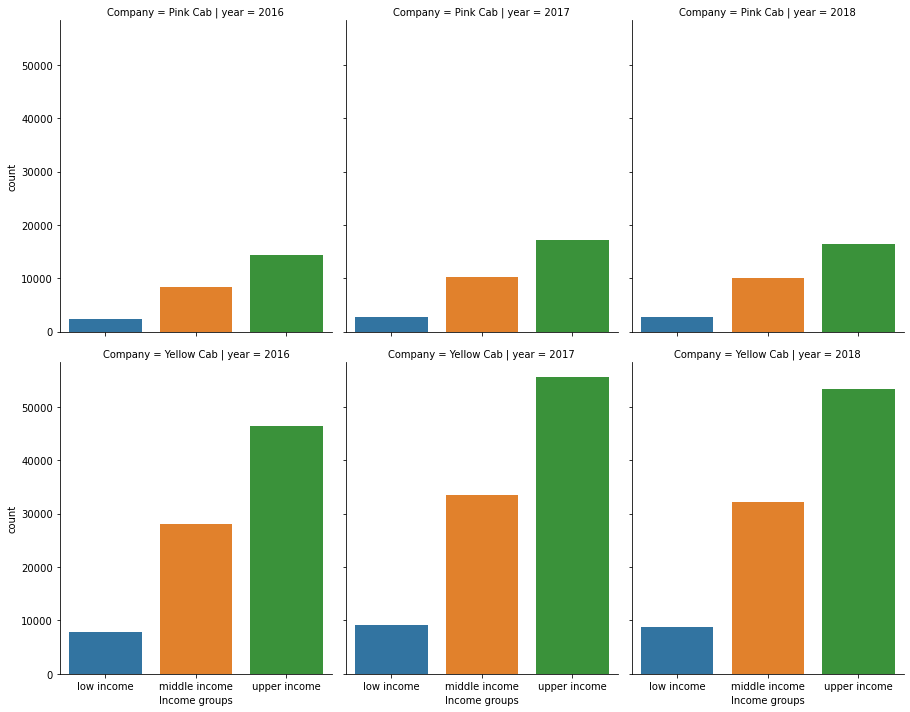

In [95]:
income_groups_count = df.groupby(['year', 'Company', 'Income groups']).size().reset_index().\
                                                                rename(columns = {0:'count'})

sns.catplot(x = 'Income groups', y = 'count', row = 'Company', col = 'year', data = income_groups_count, 
           kind = 'bar', aspect = 0.85);

The analysis shows that as the people get richer they tend to take more cab. But as we saw before there was a decline in the number of transactions for high income groups. Lets further divide the income classes as following.

In [96]:
#Binning income classes

bins = [0, 2670.5, 4450.5, 8900.5, 20000.5, 35000.5]
label = ['poor', 'low-middle class', 'middle class', 'upper-middle class', 'Rich']

df["Income Classes"] = pd.cut(df["Income (USD/Month)"], bins = bins, labels = label)

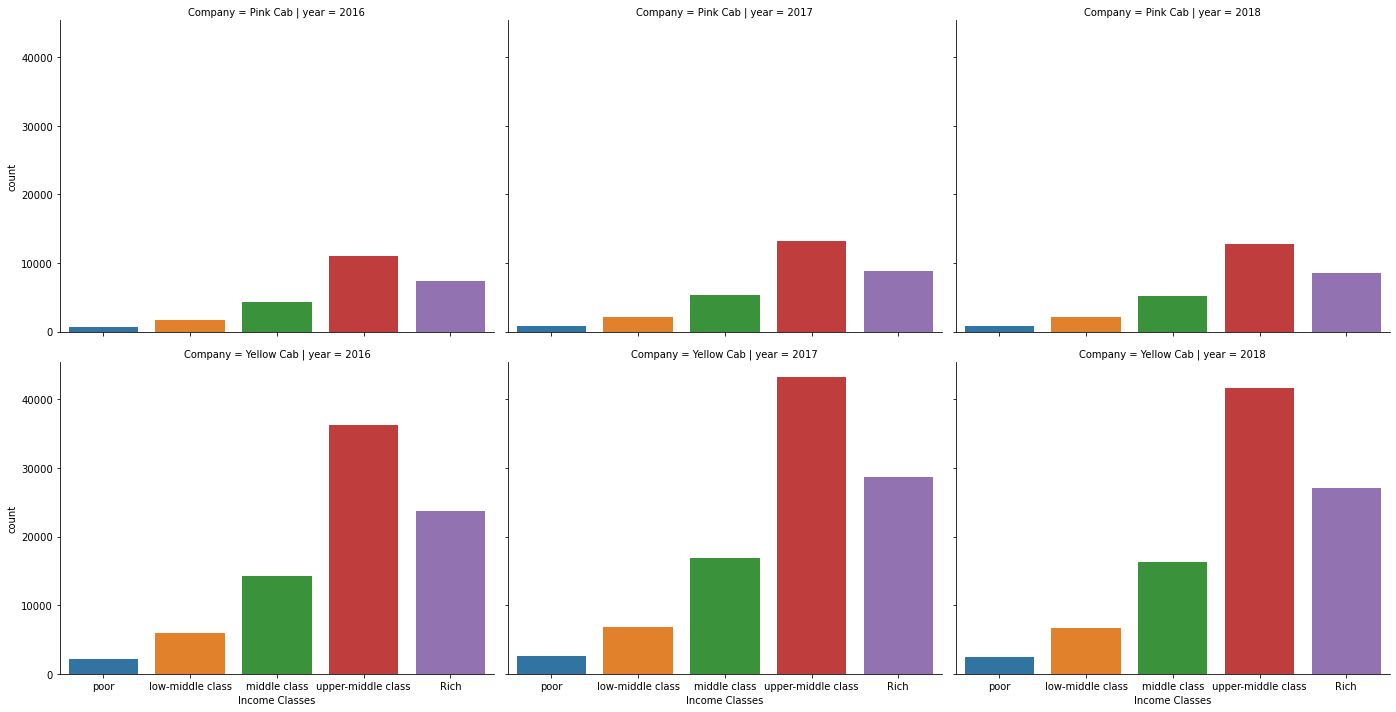

In [97]:
income_classes_count = df.groupby(['year', 'Company', 'Income Classes']).size().reset_index().\
                                                                rename(columns = {0:'count'})

sns.catplot(x = 'Income Classes', y = 'count', row = 'Company', col = 'year', data = income_classes_count, 
           kind = 'bar', aspect = 1.3);

More detailed analysis shows that the people take more cabs if they get wealthy upto a certain point. If they fall into the rich class they tend to take less cab (probably buy their own car). 

## Profit Analysis

#### Overall by cab company

In [98]:
dict1 = {"Pink Cab" : [df_p["Profit"].sum()] ,"Yellow Cab" : [df_y["Profit"].sum()] }

data_pie_1 = pd.DataFrame(dict1).T

fig1 = px.pie(data_pie_1,
                        values=data_pie_1[0],
                        names=data_pie_1.index ,title="Total Market Profit Share by Cab Firms"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 800 , height = 800 )

### Annually

In [99]:
profits_annualy = df.groupby(["Company","year"])["Profit"].sum()
profits_annualy.columns= ["Profit"]
profits_annualy=profits_annualy.reset_index(level="year")
profits_annualy=profits_annualy.reset_index(level="Company")
profits_annualy

Company  year        Profit
0    Pink Cab  2016  1.713511e+06
1    Pink Cab  2017  2.033655e+06
2    Pink Cab  2018  1.560162e+06
3  Yellow Cab  2016  1.392700e+07
4  Yellow Cab  2017  1.657598e+07
5  Yellow Cab  2018  1.351740e+07

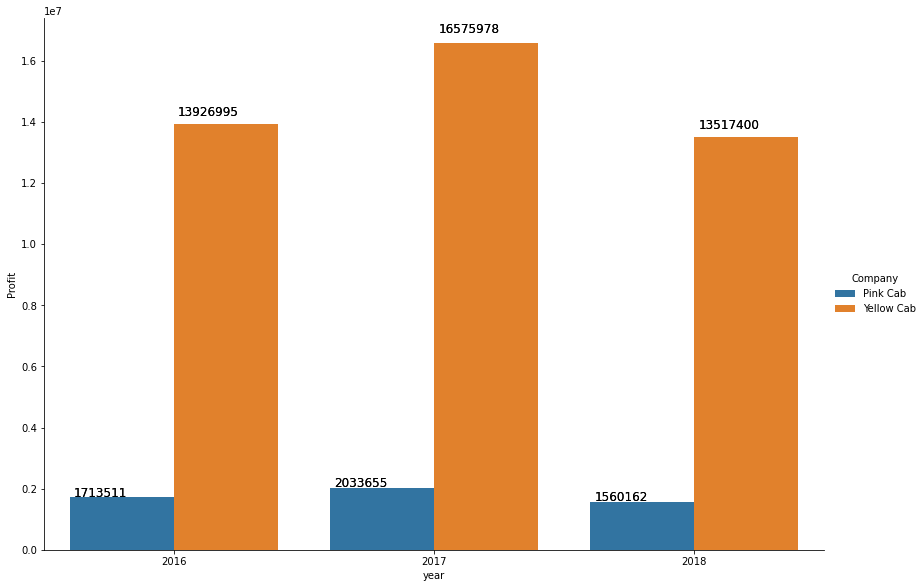

In [100]:
graph = sns.catplot(x='year', y='Profit', hue='Company', data=profits_annualy, kind='bar', height=8.27, aspect=11.7/8.27)
ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.show()

Yello cab is making almost 8 times more profits than pink cab every year

### Monthly

In [101]:
profits_monthly = df.groupby(["year", "month", "Company"])["Profit"].sum()
profits_monthly.columns= ["Profit"]
profits_monthly=profits_monthly.reset_index(level="month")
profits_monthly=profits_monthly.reset_index(level="year")
profits_monthly=profits_monthly.reset_index(level="Company")
profits_monthly.head()

Company  year  month        Profit
0    Pink Cab  2016      1  7.395286e+04
1  Yellow Cab  2016      1  8.363081e+05
2    Pink Cab  2016      2  8.747554e+04
3  Yellow Cab  2016      2  1.009169e+06
4    Pink Cab  2016      3  8.780118e+04

In [102]:
profits_monthly['year_month'] = profits_monthly['year'].astype('str') + "-" + transactions_monthly['month'].astype('str')
profits_monthly

Company  year  month        Profit year_month
0     Pink Cab  2016      1  7.395286e+04     2016-1
1   Yellow Cab  2016      1  8.363081e+05     2016-1
2     Pink Cab  2016      2  8.747554e+04     2016-2
3   Yellow Cab  2016      2  1.009169e+06     2016-2
4     Pink Cab  2016      3  8.780118e+04     2016-3
..         ...   ...    ...           ...        ...
67  Yellow Cab  2018     10  1.273756e+06    2018-10
68    Pink Cab  2018     11  2.393377e+05    2018-11
69  Yellow Cab  2018     11  1.416933e+06    2018-11
70    Pink Cab  2018     12  2.856059e+05    2018-12
71  Yellow Cab  2018     12  1.566886e+06    2018-12

[72 rows x 5 columns]

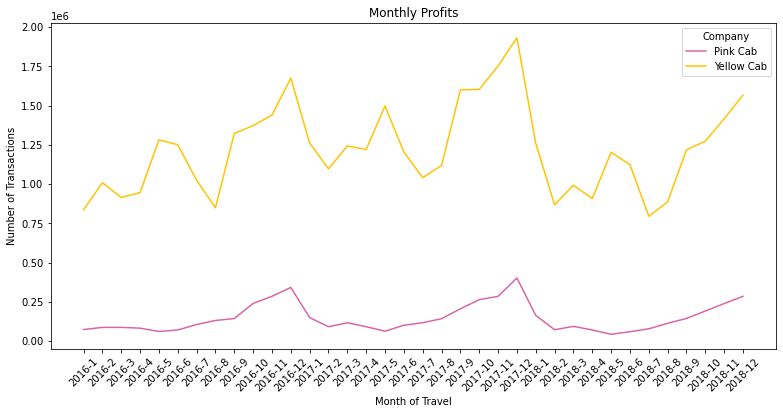

In [103]:
plt.figure(figsize = (13,6))
ax = sns.lineplot(x = 'year_month', y = 'Profit', data = profits_monthly, hue = 'Company', 
             palette = palette);

plt.xticks(rotation = 45)
plt.title('Monthly Profits');
plt.xlabel('Month of Travel');
plt.ylabel('Number of Transactions');

#### Monthly Average Profits 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



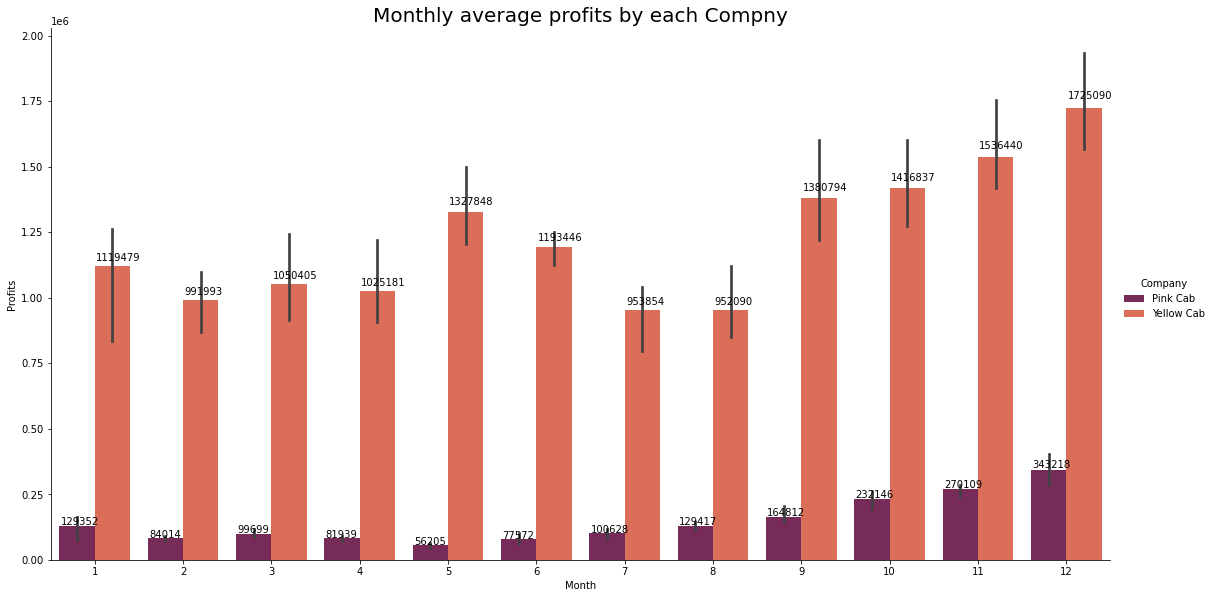

In [104]:
g=sns.catplot('month','Profit',data=profits_monthly,kind='bar',hue='Company',palette = 'rocket', height=8.27, aspect=15.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.title('Monthly average profits by each Compny',fontsize=20)
plt.ylabel('Profits')
plt.xlabel('Month')
plt.show()

### Monthly profit analysis by city

#### Average profits per city

In [105]:
# same information in Pie chart
data_pie_2 = df.groupby("City").sum()
fig1 = px.pie(data_pie_2,
                        values=data_pie_2.Profit,
                        names=data_pie_2.index ,title="Total Market Profit Share by Cities"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 900 , height = 800 )


In [106]:
profits_city = df.groupby(["Company","City"])["Profit"].sum()
profits_city.columns= ["Profit"]
profits_city=profits_city.reset_index(level="City")
profits_city=profits_city.reset_index(level="Company")
profits_city.head()

Company        City      Profit
0  Pink Cab  ATLANTA GA   96050.076
1  Pink Cab   AUSTIN TX  147445.290
2  Pink Cab   BOSTON MA  262001.698
3  Pink Cab  CHICAGO IL  318722.488
4  Pink Cab   DALLAS TX   24730.112

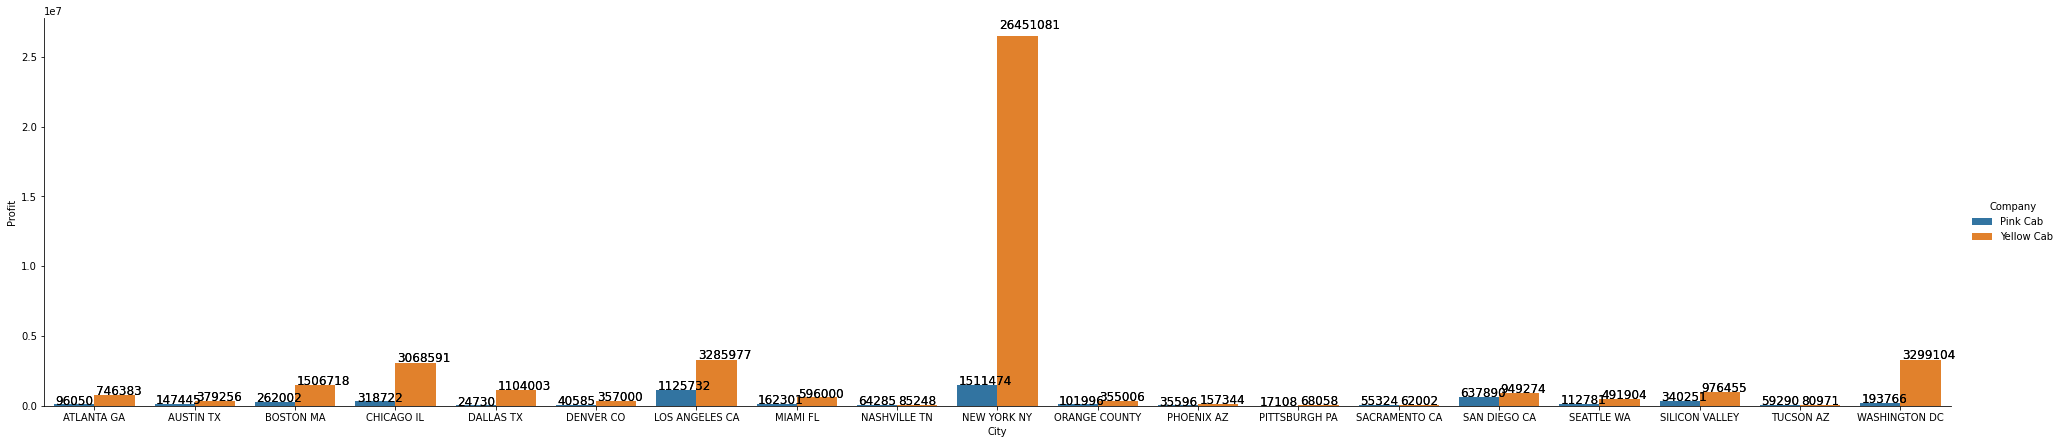

In [107]:
graph = sns.catplot(x='City', y='Profit', hue='Company', data=profits_city, kind='bar', height=6.27, aspect=18.7/4.27)
ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
ax = graph.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.show()

For both cab companies, NY is the most profitable city for business

#### Monthly expenses, price charged, profits

In [108]:
#Grouping by year, month, state and company and taking the median of Cab fare and expenses

#I take the median, as the distribution of both profit and price charged in heavily skewed to the right.

cab_monthly_finances = df.groupby(['year', 'month', 'City', 'Company']).\
median()[['Price Charged', 'Cost of Trip', 'Profit']].reset_index()

#Concatenating year and month into a single column
cab_monthly_finances['year_month'] = cab_monthly_finances['year'].astype('str') + "-" + \
                                                cab_monthly_finances['month'].astype('str')

#dropping individual year and month column
cab_monthly_finances.drop(['year', 'month'], axis = 1, inplace = True)

#unpivoting price charge and cost of trip in order to make it easier to plot both in a single axis
cab_monthly_finances = cab_monthly_finances.melt(id_vars = ['City', 'Company', 'year_month'], 
                                                 var_name = 'inc_exp', value_name = 'amount')

cab_monthly_finances

City     Company year_month        inc_exp    amount
0         ATLANTA GA    Pink Cab     2016-1  Price Charged  340.6000
1         ATLANTA GA  Yellow Cab     2016-1  Price Charged  483.7300
2          AUSTIN TX    Pink Cab     2016-1  Price Charged  210.1800
3          AUSTIN TX  Yellow Cab     2016-1  Price Charged  662.4100
4          BOSTON MA    Pink Cab     2016-1  Price Charged  244.7850
...              ...         ...        ...            ...       ...
4099  SILICON VALLEY  Yellow Cab    2018-12         Profit  174.2544
4100       TUCSON AZ    Pink Cab    2018-12         Profit   86.8260
4101       TUCSON AZ  Yellow Cab    2018-12         Profit   26.9260
4102   WASHINGTON DC    Pink Cab    2018-12         Profit   52.0540
4103   WASHINGTON DC  Yellow Cab    2018-12         Profit   30.4046

[4104 rows x 5 columns]

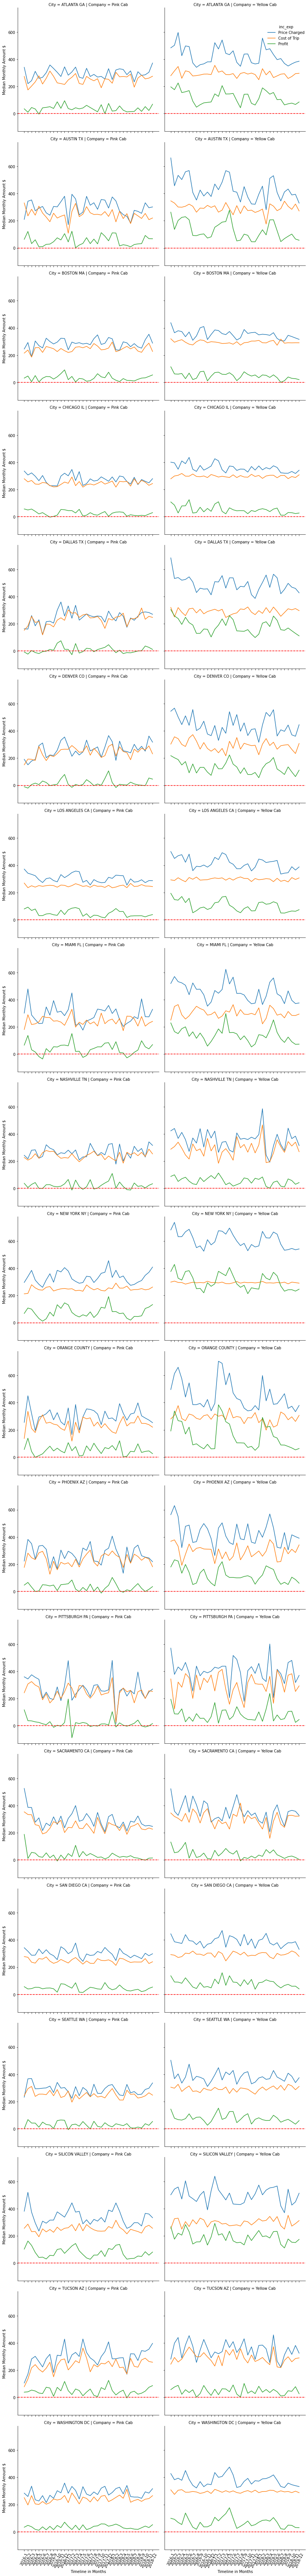

In [109]:
g = sns.relplot(y = 'amount', x = 'year_month', data = cab_monthly_finances, kind = 'line', 
                hue = 'inc_exp', row = 'City', col = 'Company');

axes = g.axes.flatten()

for ax in axes:
    ax.axhline(0, ls='--', color='red') #to mark profit below zero

g.set_xticklabels(rotation=65);
plt.tight_layout();

g.set_ylabels("Median Monthly Amount $");
g.set_xlabels("Timeline in Months");
g._legend.set_bbox_to_anchor((0.99, 0.985))

### Losses 

In [110]:
df_loss = df.query("Profit <= 0")
print(df_loss.shape)
df_loss.head()

(24823, 21)


Transaction ID Date of Travel  year  month  day   Company  \
105787        10000070     2016-01-02  2016      1    2  Pink Cab   
98779         10000067     2016-01-02  2016      1    2  Pink Cab   
98775         10000066     2016-01-02  2016      1    2  Pink Cab   
297262        10000356     2016-01-02  2016      1    2  Pink Cab   
315732        10000378     2016-01-05  2016      1    5  Pink Cab   

                 City  Population   Users  Users/Population  ...  \
105787      DENVER CO      754233   12421          0.016468  ...   
98779       DALLAS TX      942908   22157          0.023499  ...   
98775       DALLAS TX      942908   22157          0.023499  ...   
297262     SEATTLE WA      671238   25063          0.037338  ...   
315732  WASHINGTON DC      418859  127001          0.303207  ...   

        Price Charged  Cost of Trip  Profit  Customer ID  Payment_Mode Gender  \
105787          61.30        82.836 -21.536        30718          Cash   Male   
98779          308.58       386.512 -77.932        25247          Cash   Male   
98775          122.42       149.682 -27.262        25155          Card   Male   
297262         171.47       171.925  -0.455        38635          Card   Male   
315732         295.60       348.075 -52.475        51246          Card   Male   

       Age  Income (USD/Month)  Income groups      Income Classes  
105787  52               20255   upper income                Rich  
98779   26               24178   upper income                Rich  
98775   27               10997  middle income  upper-middle class  
297262  31               24682   upper income                Rich  
315732  61                2035     low income                poor  

[5 rows x 21 columns]

There are 24823 transactions which were a loss. Let's find out which transactions were they and where

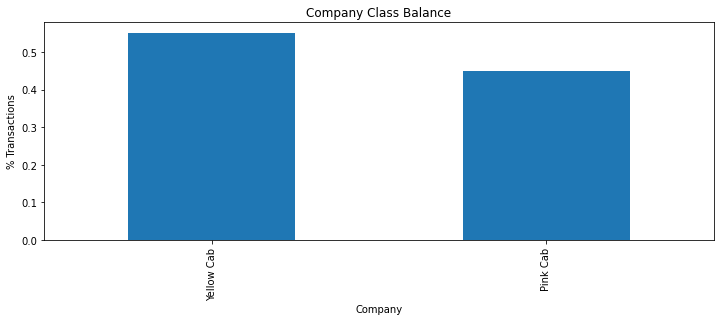

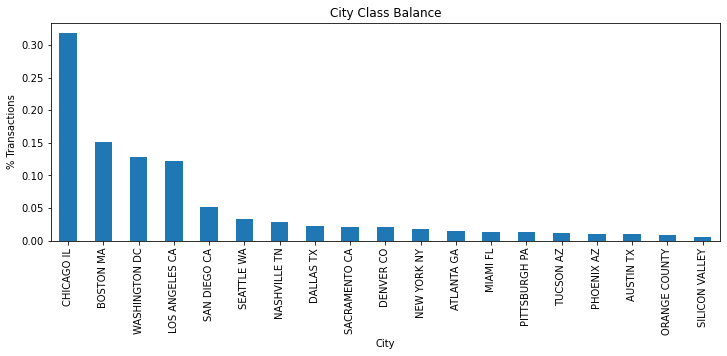

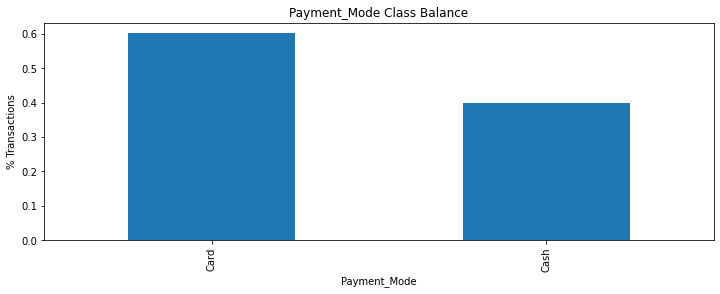

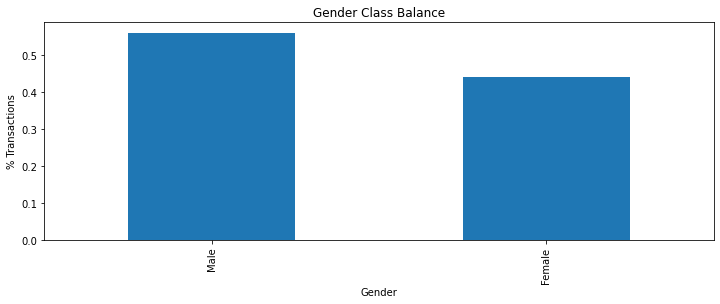

In [111]:
for var in categorical_var:
    
    plt.figure(figsize=(12,4))
    
    # plot transformed variable vs sale price
    df_loss[var].value_counts(normalize = True).plot(
    kind="bar",
    xlabel=f"{var}",
    ylabel="% Transactions",
    title=f"{var} Class Balance"
    )
                
    plt.show()

Although Yellow cab carry 3 times more overall transactions than pink cab, it only carried a little more loss transactions than pink cab. This shows that pink cab has a greater loss transaction ratio than yellow cab.

Chicago is the city with the most loss transactions followed by Boston, Washington and Los Angeles. 

Payment mode or gender has the same distribution as total transactions meaning that they do no impact loss transactions. 

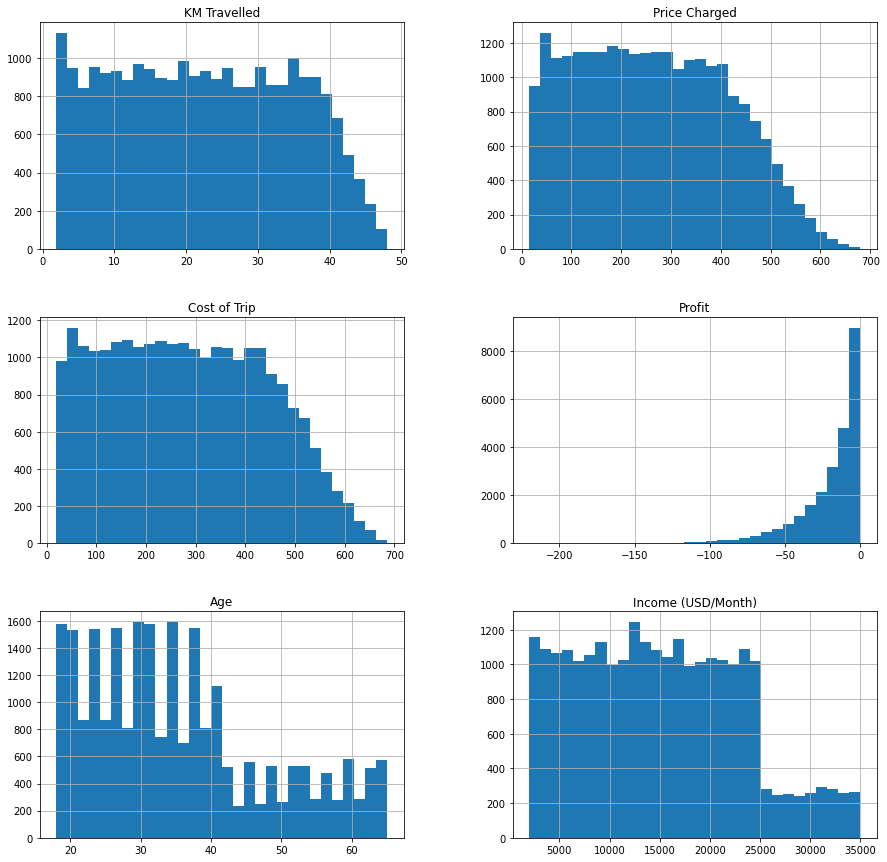

In [112]:
# lets plot histograms for all continuous variables

df_loss[continuous_var].hist(bins=30, figsize=(15,15))
plt.show()

By comparing the distributions with the full dataframe df, we can see that the main difference between the loss transactions is that the price charged is less for these transactions which lead to losses. The reason we can claim this is because the KM travelled and Cost of Trip follows the same distribution as the full dataframe df. 

Lets look into the losses in more detail

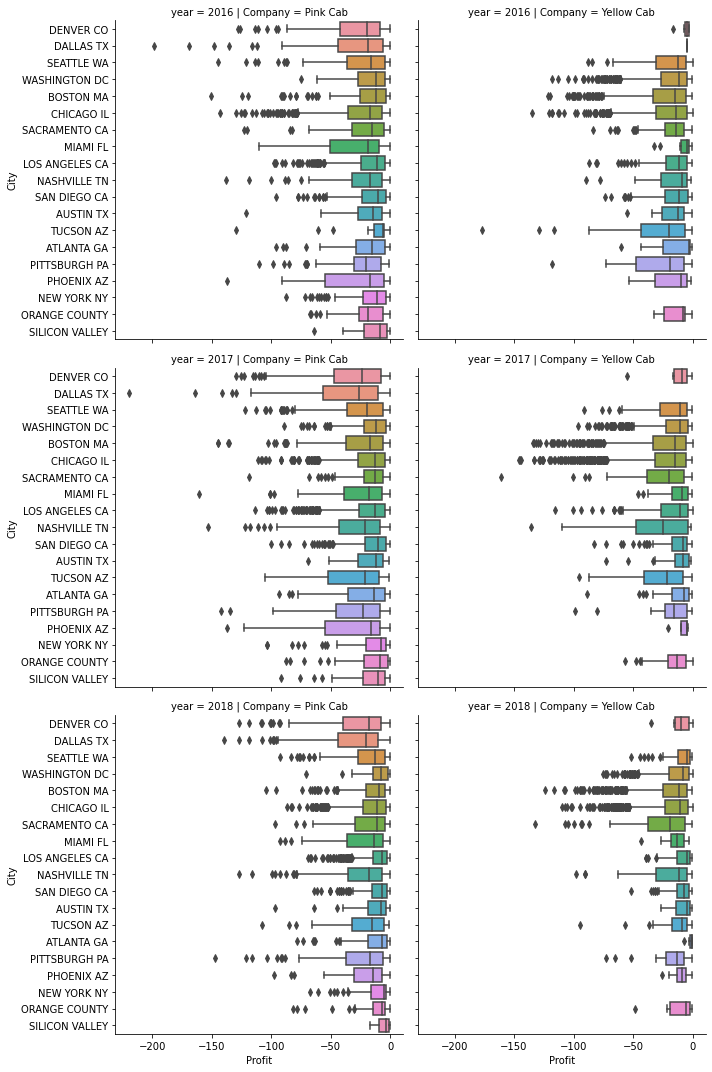

In [113]:
sns.catplot(y = 'City', x = 'Profit', col = 'Company', data = df_loss, kind = 'box', row = 'year');

Pink cab has incurred losses more frequently over the time period

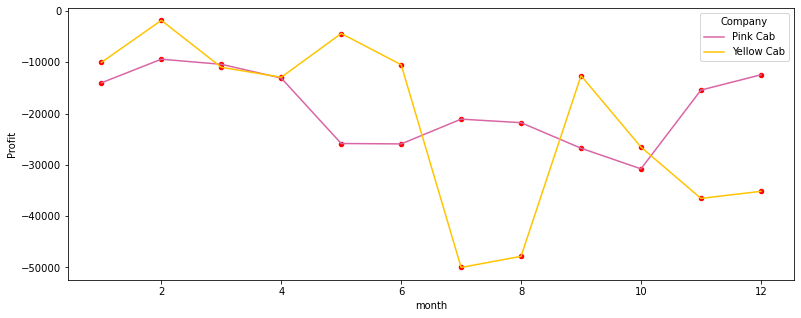

In [114]:
total_loss_monthly = df_loss.groupby(['month', 'Company']).sum()['Profit'].sort_values().reset_index()

plt.figure(figsize = (13,5))

ax = sns.lineplot(x = 'month', y = 'Profit', data = total_loss_monthly, hue = 'Company', 
             hue_order = ['Pink Cab', 'Yellow Cab'], palette = palette);

total_loss_monthly.loc[:50, ["month", "Profit"]].plot.scatter("month", "Profit", 
                                                            color = 'red', ax = ax);

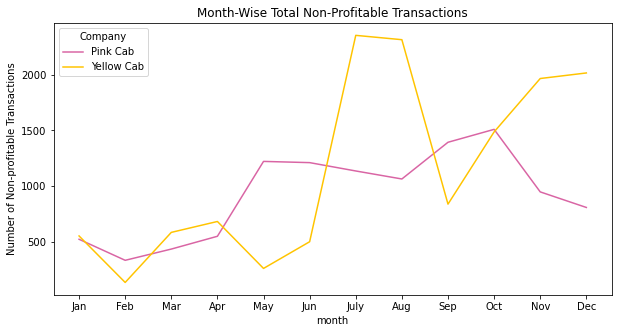

In [115]:
loss_count_monthly = df_loss.groupby(['month', 'Company']).size().reset_index().\
                                                        rename(columns = {0:'count'})

plt.figure(figsize = (10,5))
sns.lineplot(x = 'month', y = 'count', hue = 'Company', data = loss_count_monthly, 
             palette = palette);

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(np.arange(1,13,1), labels = months);
plt.ylabel('Number of Non-profitable Transactions');
plt.title("Month-Wise Total Non-Profitable Transactions");

July and August are the months where the most losses occured for yellow cab. For pink cab may-october has incurred the most losses.

In [116]:
df_loss['year_month'] = df_loss['year'].astype('str') + "-" + df_loss['month'].astype('str')
df_loss.head()

C:\Users\Taimoor Razi\AppData\Local\Temp\ipykernel_20068\256545642.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Transaction ID Date of Travel  year  month  day   Company  \
105787        10000070     2016-01-02  2016      1    2  Pink Cab   
98779         10000067     2016-01-02  2016      1    2  Pink Cab   
98775         10000066     2016-01-02  2016      1    2  Pink Cab   
297262        10000356     2016-01-02  2016      1    2  Pink Cab   
315732        10000378     2016-01-05  2016      1    5  Pink Cab   

                 City  Population   Users  Users/Population  ...  \
105787      DENVER CO      754233   12421          0.016468  ...   
98779       DALLAS TX      942908   22157          0.023499  ...   
98775       DALLAS TX      942908   22157          0.023499  ...   
297262     SEATTLE WA      671238   25063          0.037338  ...   
315732  WASHINGTON DC      418859  127001          0.303207  ...   

        Cost of Trip  Profit  Customer ID  Payment_Mode  Gender Age  \
105787        82.836 -21.536        30718          Cash    Male  52   
98779        386.512 -77.932        25247          Cash    Male  26   
98775        149.682 -27.262        25155          Card    Male  27   
297262       171.925  -0.455        38635          Card    Male  31   
315732       348.075 -52.475        51246          Card    Male  61   

       Income (USD/Month)  Income groups      Income Classes year_month  
105787              20255   upper income                Rich     2016-1  
98779               24178   upper income                Rich     2016-1  
98775               10997  middle income  upper-middle class     2016-1  
297262              24682   upper income                Rich     2016-1  
315732               2035     low income                poor     2016-1  

[5 rows x 22 columns]

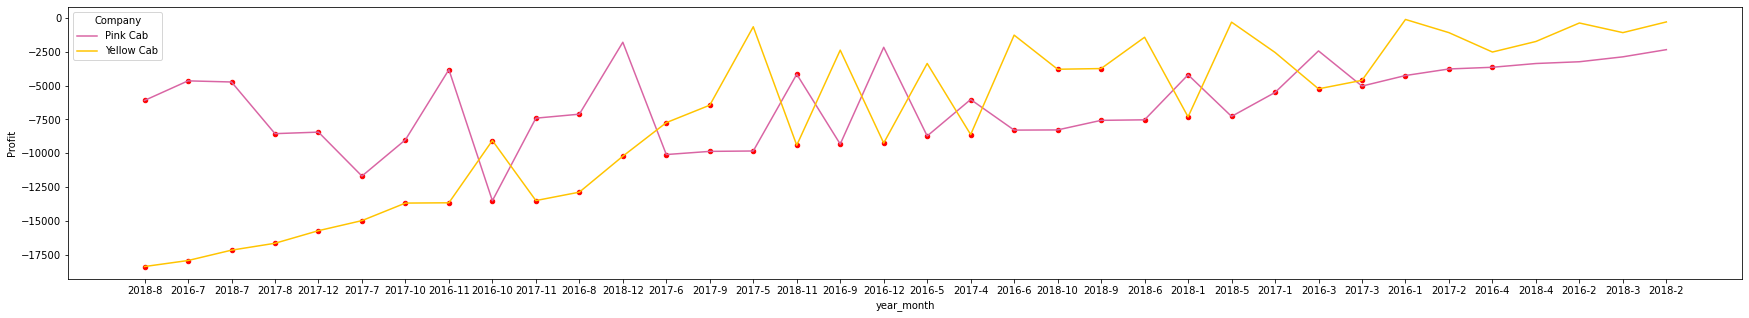

In [117]:
total_loss = df_loss.groupby(['year_month', 'Company']).sum()['Profit'].sort_values().reset_index()

plt.figure(figsize = (30,5))

ax = sns.lineplot(x = 'year_month', y = 'Profit', data = total_loss, hue = 'Company', 
             hue_order = ['Pink Cab', 'Yellow Cab'], palette = palette);

total_loss.loc[:50, ["year_month", "Profit"]].plot.scatter("year_month", "Profit", 
                                                            color = 'red', ax = ax);

Clearly July and August are incurring the most losses every year. 
For pink cab the most losses were incurred in October, 2016. 
For yellow cab the most losses were incurred in August, 2018

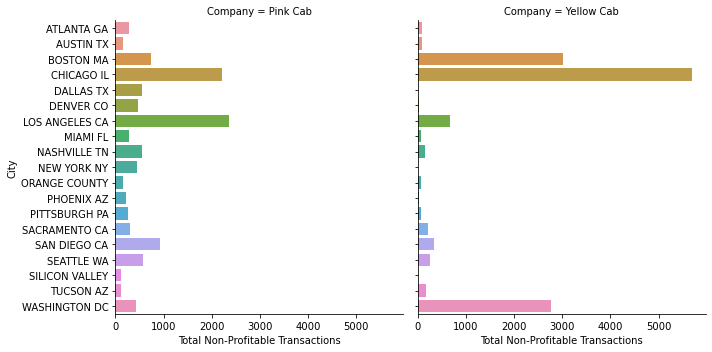

In [118]:
loss_city = df_loss.groupby(['City', 'Company']).size().reset_index().rename(columns = {0:'count'})

g = sns.catplot(y = 'City', x = 'count', col = 'Company', data = loss_city, kind = 'bar');

g.set_xlabels("Total Non-Profitable Transactions");

For yellow cab, Los Angeles, Washington, Chicago and Boston is incurring the most losses. But even after incurring the most loss transactions it is also generating high profitable transactions for yellow cab leading to an overall good performance (previous section graphs). More research in needed to understand why they are incurring high losses and why they are charging less price for these transactions. 

For pink cab, most of the cities are incurring frequent losses. However, the most transactions with losses are at Los Angeles, Chicago, San Diego and Boston. Los Angeles and San Diego are still highly profitable for pink company inspite of these losses. Chicago and Bostin are also overall profitable considering monthly profits but in some months they have close to zero profits and are barely surviving. 

### Profit Analysis by Distance Travelled (Km)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



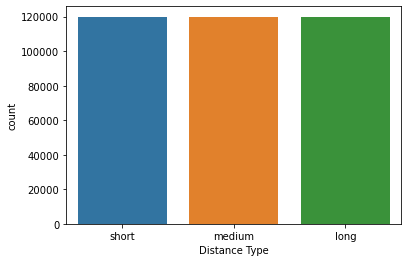

In [119]:
#Binning distance classes


label = ['short', 'medium', 'long']
#Short distance = 1.899 to 15.47 km
#medium distance = 15.47 to 29.4 km
#Long distance = 29.4 to 48.0 km

df["Distance Type"] = pd.qcut(df["KM Travelled"], 3, labels = label)


sns.countplot(df["Distance Type"]);

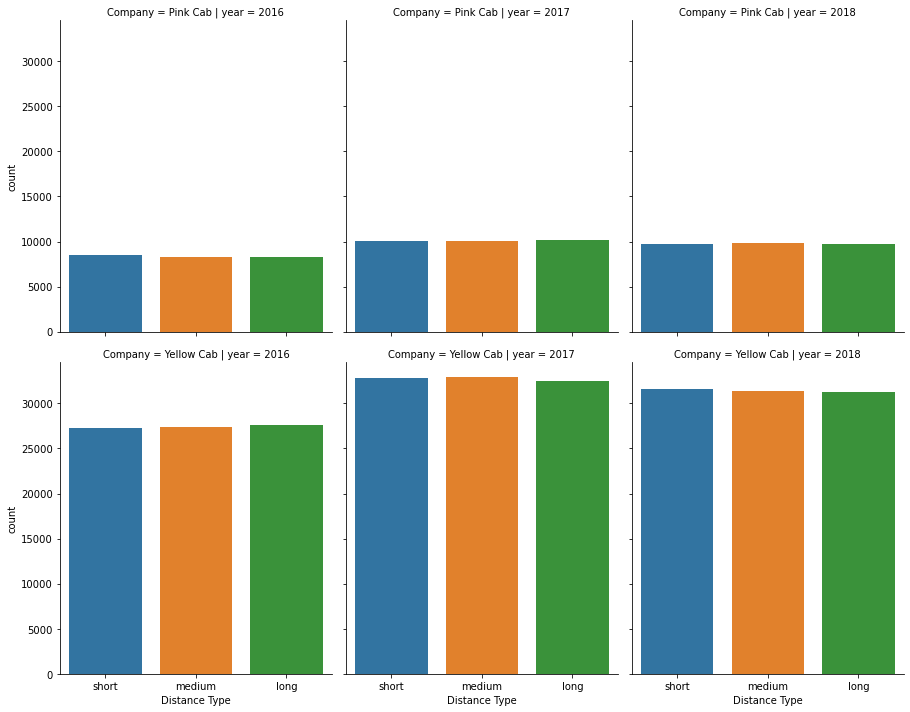

In [120]:
distance_classes_count = df.groupby(['year', 'Company', 'Distance Type']).size().reset_index().\
                                                                rename(columns = {0:'count'})

sns.catplot(x = 'Distance Type', y = 'count', row = 'Company', col = 'year', data = distance_classes_count, 
           kind = 'bar', aspect = 0.85);

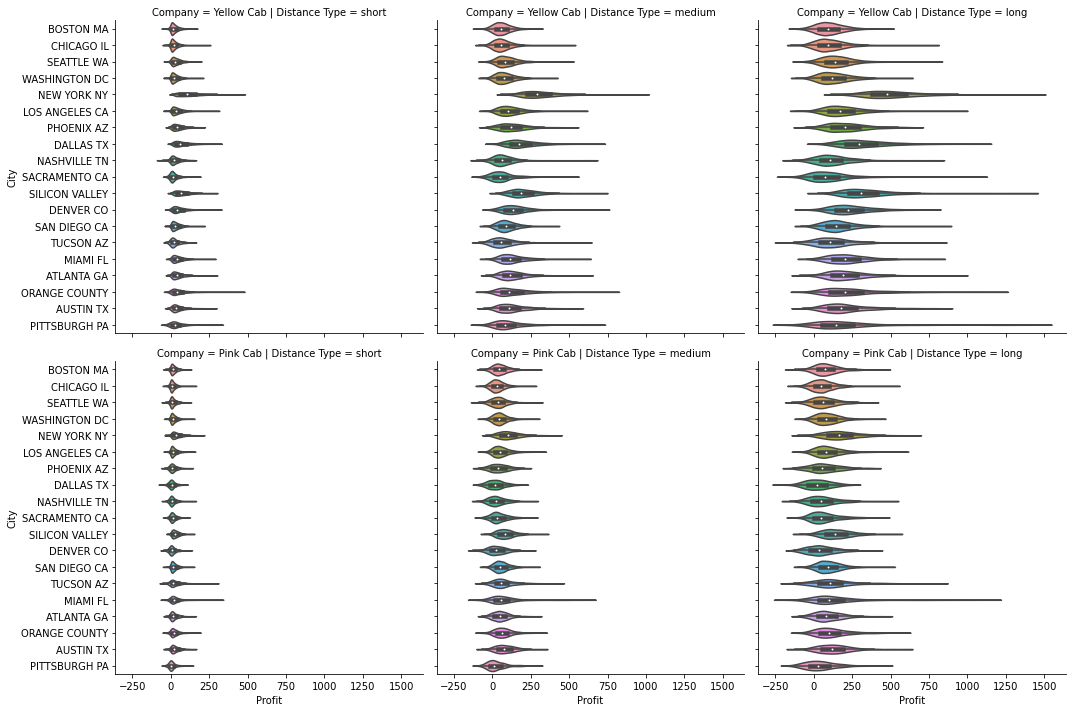

In [121]:
sns.catplot(x = 'Profit', y = 'City', data = df, row = 'Company', kind = 'violin', 
           col = 'Distance Type');

plt.tight_layout()

From the above plot, there is a higher probability of making high profits when the trip duration is long across all states.

Lets look at the losses

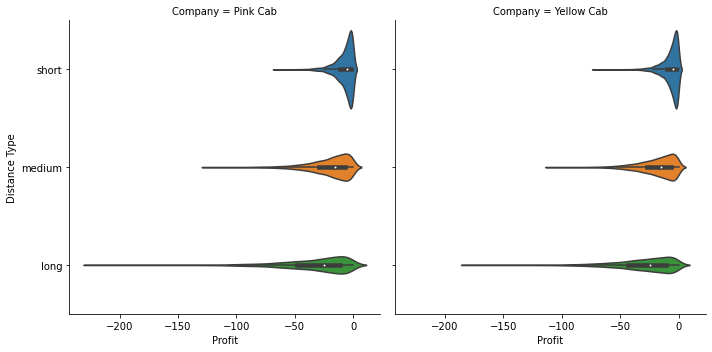

In [122]:
df_loss = df.query("Profit < 0")[['Profit', 'Company', 'Distance Type']]
g = sns.catplot(x = 'Profit', y = 'Distance Type', col = 'Company', data = df_loss, kind = 'violin');

For both Cab companies, short trips results in higher frequency of losses. Losses made during medium trips are roughly the same for both. For long trips, although the frequency is less compared to other two intervals, there is a small probability to make higher losses.  
Pink Cab
  has has trips with the highest losses compared to it's rival.

In [123]:
df["Profit"].min()

-220.06

In [124]:
df["Profit"].max()

1463.9660000000003

In [125]:
bins = [-220.5, 0.0001, 30.5, 85.5, 200.5, 800.5, 1464]

label = ['loss', 'low', 'average', 'above-average', 'high', 'highest']

df['Profit_Level'] = pd.cut(df.Profit, bins = bins, labels = label)

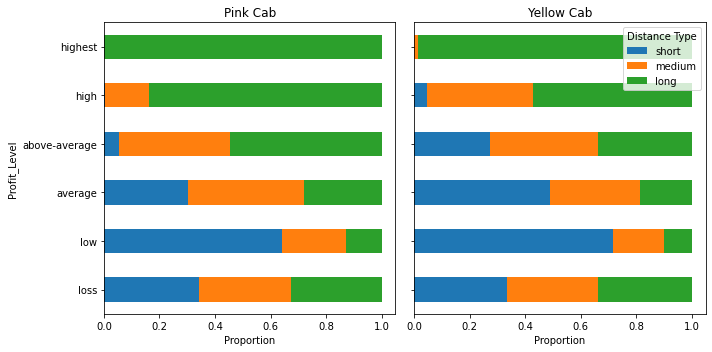

In [126]:
fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = True, tight_layout = True);

pd.crosstab(index = df.query("Company == 'Pink Cab'")["Profit_Level"], 
            columns = df.query("Company == 'Pink Cab'")["Distance Type"], normalize = 'index').\
plot(kind = 'barh', stacked = True, ax = ax[0], title = "Pink Cab", legend = False);

ax[0].set_xlabel('Proportion');

pd.crosstab(index = df.query("Company == 'Yellow Cab'")["Profit_Level"], 
            columns = df.query("Company == 'Yellow Cab'")["Distance Type"], 
            normalize = 'index').plot(kind = 'barh', stacked = True, ax = ax[1], 
                                     title = "Yellow Cab");

ax[1].set_xlabel('Proportion');

The highest profits are almost alwasy made by long distance rides and low profits are made by short distance rides. The import thing to notice here is that the loss is not dependent on the distance as all the distance types make similar proportion of total losses as their proportion of total transactions.

#### Cost Analysis by distance 

In [127]:
df["Cost of Trip"].min()

19.0

In [128]:
df["Cost of Trip"].max()

691.2

In [129]:
bins = [0, 30.5, 85.5, 150, 300, 600]

label = ['low', 'average', 'above-average', 'high', 'highest']

df['Cost_Level'] = pd.cut(df["Cost of Trip"], bins = bins, labels = label)

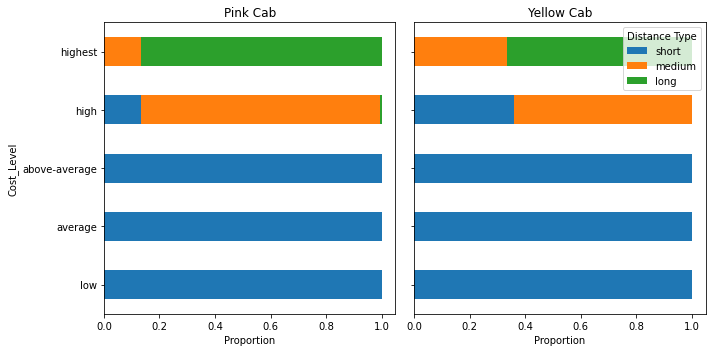

In [130]:
fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = True, tight_layout = True);

pd.crosstab(index = df.query("Company == 'Pink Cab'")["Cost_Level"], 
            columns = df.query("Company == 'Pink Cab'")["Distance Type"], normalize = 'index').\
plot(kind = 'barh', stacked = True, ax = ax[0], title = "Pink Cab", legend = False);

ax[0].set_xlabel('Proportion');

pd.crosstab(index = df.query("Company == 'Yellow Cab'")["Cost_Level"], 
            columns = df.query("Company == 'Yellow Cab'")["Distance Type"], 
            normalize = 'index').plot(kind = 'barh', stacked = True, ax = ax[1], 
                                     title = "Yellow Cab");

ax[1].set_xlabel('Proportion');

As expected, the cost of a ride increases with increasing distance. However, it is worthwhie to notice that the highest costs that pink cab experience is on long distance rides. Also, high costs are incurred mostly on long and medium distances. But when we look at the yellow cab costs, we see that the highest costs are also experienced on medium distance rides or and high costs are occured on short and medium distances. 

It will not be wrong to guess that the yellow cab company is using better quality cars which also consume higher fuel. This leads to higher costs and is the same reason which makes them charge higher price as well as their service is more comfortbale and luxurious. However, this is just an assumption and should be researched further.

#### Price Analysis by distance 

In [131]:
df["Price Charged"].max()

2048.03

In [132]:
df["Price Charged"].min()

15.6

In [133]:
bins = [15, 100, 250, 500, 900, 2050]

label = ['low', 'average', 'above-average', 'high', 'highest']

df['price_Level'] = pd.cut(df["Price Charged"], bins = bins, labels = label)

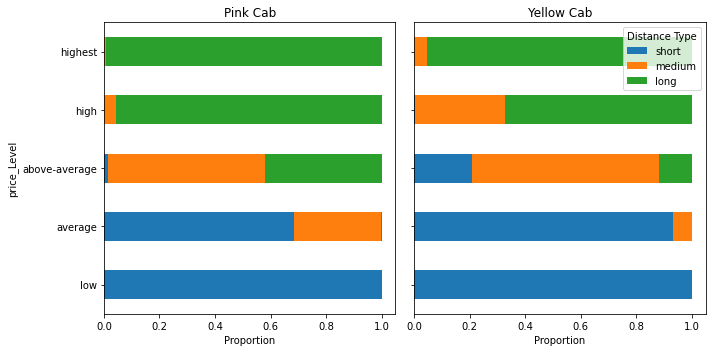

In [134]:
fig, ax = plt.subplots(1,2, figsize = (10,5), sharey = True, tight_layout = True);

pd.crosstab(index = df.query("Company == 'Pink Cab'")["price_Level"], 
            columns = df.query("Company == 'Pink Cab'")["Distance Type"], normalize = 'index').\
plot(kind = 'barh', stacked = True, ax = ax[0], title = "Pink Cab", legend = False);

ax[0].set_xlabel('Proportion');

pd.crosstab(index = df.query("Company == 'Yellow Cab'")["price_Level"], 
            columns = df.query("Company == 'Yellow Cab'")["Distance Type"], 
            normalize = 'index').plot(kind = 'barh', stacked = True, ax = ax[1], 
                                     title = "Yellow Cab");

ax[1].set_xlabel('Proportion');

Yellow cab charged higher prices for similar distancee travelled than pink cab. However, we can notice that there are some rides which are charged higher even though their distance is short and some rides are charged lower even their distance is higher.  
This is due to price differences in different cities.

### Customer Loyalty/ Regular Users Analysis

It is difficult to define the point at which customer can be considered loyal. We can divide customer loyalty into 3 further types. 

Medium Loyalty Customers: 5 rides

Medium-High Loyalty Customers: 10 rides 

High Loyalty Customers: 20 rides

#### More than 5 rides

In [135]:
customer_rides = df.groupby(["Customer ID", "Company"]).size().reset_index().rename(columns={0:"count"})

#identifying customer's that has utilized a particular Cab company atleast 5 times.
customer_rides['is_loyal_five'] = np.where(customer_rides['count'] >= 5, 'Loyal', "Not Loyal")

customer_rides

Customer ID     Company  count is_loyal_five
0                1    Pink Cab      4     Not Loyal
1                1  Yellow Cab     25         Loyal
2                2    Pink Cab      4     Not Loyal
3                2  Yellow Cab     36         Loyal
4                3    Pink Cab      6         Loyal
...            ...         ...    ...           ...
72221        59998  Yellow Cab      6         Loyal
72222        59999    Pink Cab      2     Not Loyal
72223        59999  Yellow Cab      6         Loyal
72224        60000    Pink Cab      4     Not Loyal
72225        60000  Yellow Cab     14         Loyal

[72226 rows x 4 columns]

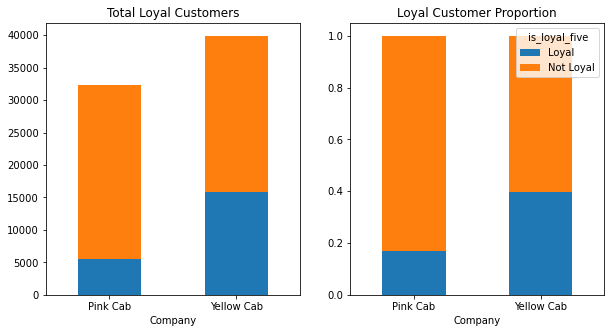

In [136]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

pd.crosstab(index = customer_rides["Company"], columns = customer_rides["is_loyal_five"]).plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers", ax = ax[0], legend = False);

pd.crosstab(index = customer_rides["Company"], columns = customer_rides["is_loyal_five"], normalize = 'index').plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal Customer Proportion", ax = ax[1]);

In [137]:
customer_rides = customer_rides[customer_rides["is_loyal_five"]=="Loyal"]
customer_rides

Customer ID     Company  count is_loyal_five
1                1  Yellow Cab     25         Loyal
3                2  Yellow Cab     36         Loyal
4                3    Pink Cab      6         Loyal
5                3  Yellow Cab     40         Loyal
7                4  Yellow Cab     25         Loyal
...            ...         ...    ...           ...
72216        59995  Yellow Cab     11         Loyal
72219        59997  Yellow Cab      8         Loyal
72221        59998  Yellow Cab      6         Loyal
72223        59999  Yellow Cab      6         Loyal
72225        60000  Yellow Cab     14         Loyal

[21295 rows x 4 columns]

In [138]:
customer_loyalty_five = customer_rides.groupby(["is_loyal_five", "Company"]).size().reset_index().rename(columns={0:"count"})
customer_loyalty_five

is_loyal_five     Company  count
0         Loyal    Pink Cab   5515
1         Loyal  Yellow Cab  15780

In [139]:
customer_loyalty_five["proportion"] = customer_loyalty_five["count"]/customer_loyalty_five["count"].sum()
customer_loyalty_five

is_loyal_five     Company  count  proportion
0         Loyal    Pink Cab   5515    0.258981
1         Loyal  Yellow Cab  15780    0.741019

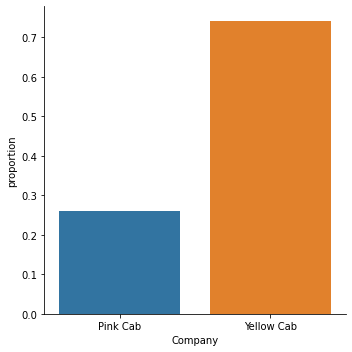

In [140]:
sns.catplot(x='Company', y='proportion', data=customer_loyalty_five, kind='bar')

#### More than 10 rides

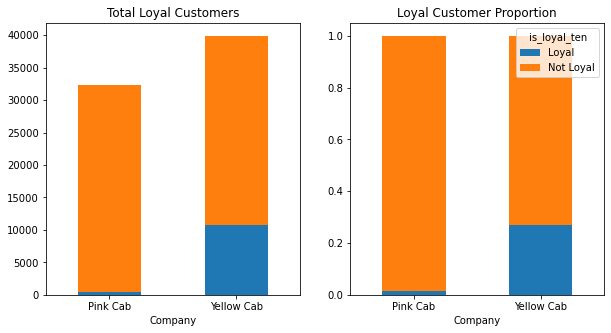

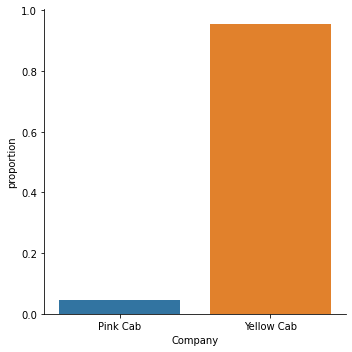

In [141]:
customer_rides = df.groupby(["Customer ID", "Company"]).size().reset_index().rename(columns={0:"count"})

#identifying customer's that has utilized a particular Cab company atleast 10 times.
customer_rides['is_loyal_ten'] = np.where(customer_rides['count'] >= 10, 'Loyal', "Not Loyal")

# Graph
fig, ax = plt.subplots(1,2, figsize = (10,5))
pd.crosstab(index = customer_rides["Company"], columns = customer_rides["is_loyal_ten"]).plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers", ax = ax[0], legend = False);
pd.crosstab(index = customer_rides["Company"], columns = customer_rides["is_loyal_ten"], normalize = 'index').plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal Customer Proportion", ax = ax[1]);

# İdentifying only loyal customers
customer_rides = customer_rides[customer_rides["is_loyal_ten"]=="Loyal"]

# Summing loyal customers for each company
customer_loyalty_ten = customer_rides.groupby(["is_loyal_ten", "Company"]).size().reset_index().rename(columns={0:"count"})

# Proportion
customer_loyalty_ten["proportion"] = customer_loyalty_ten["count"]/customer_loyalty_ten["count"].sum()

# Graph
sns.catplot(x='Company', y='proportion', data=customer_loyalty_ten, kind='bar')

#### More than 20 rides

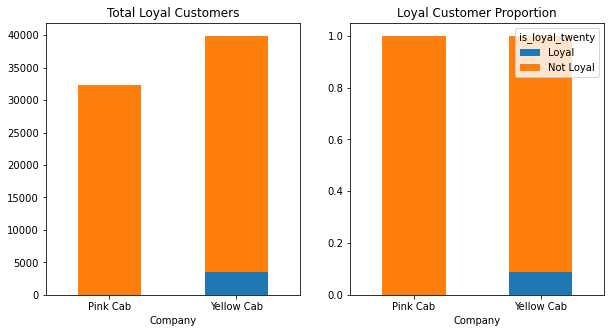

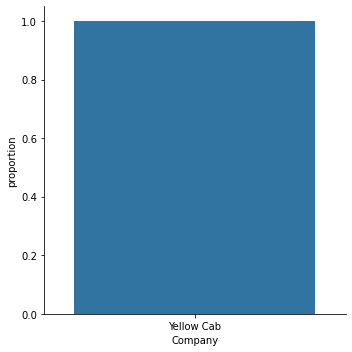

In [142]:
customer_rides = df.groupby(["Customer ID", "Company"]).size().reset_index().rename(columns={0:"count"})

#identifying customer's that has utilized a particular Cab company atleast 15 times.
customer_rides['is_loyal_twenty'] = np.where(customer_rides['count'] >= 20, 'Loyal', "Not Loyal")

# Graph
fig, ax = plt.subplots(1,2, figsize = (10,5))
pd.crosstab(index = customer_rides["Company"], columns = customer_rides["is_loyal_twenty"]).plot(kind = 'bar', rot = 0, stacked = True, title = "Total Loyal Customers", ax = ax[0], legend = False);
pd.crosstab(index = customer_rides["Company"], columns = customer_rides["is_loyal_twenty"], normalize = 'index').plot(kind = 'bar', rot = 0, stacked = True, title = "Loyal Customer Proportion", ax = ax[1]);

# İdentifying only loyal customers
customer_rides = customer_rides[customer_rides["is_loyal_twenty"]=="Loyal"]

# Summing loyal customers for each company
customer_loyalty_twenty = customer_rides.groupby(["is_loyal_twenty", "Company"]).size().reset_index().rename(columns={0:"count"})

# Proportion
customer_loyalty_twenty["proportion"] = customer_loyalty_twenty["count"]/customer_loyalty_twenty["count"].sum()

# Graph
sns.catplot(x='Company', y='proportion', data=customer_loyalty_twenty, kind='bar')

It can be clearly seen that yellow cab has more loyal customers (of all type) who use their cab multiple times. 
All the highest loyalty customer who use the cab 20 times or more belong to yellow cab and this shows a clear preference by the regular users for yellow cab. 

## Investment Recommendation and Hypothesis Results

### Hypothesis Review

Lets review our initial hypotesis and see if we can answer all of them now.

Hyothesis: Is there any seasonality in number of customers using the cab service?

Yes there is a clear seasonality as shown by our demand analysis. on monthly level, the demand increases gradually over the year and then fallsat the start of the next year. The same pattern is seen for all 3 years. 
The maximum demand is at the end of year in winters for every year. This makes sense as people tend to use taxi more in cold weather. This trend is seen for both companies regardless of the city of bussinesss.

Hypothesis: Is some specific age group taking taxi more? Is there a certain age group which prefer one of the company?

According to our demand analysis, we see that different age groups have different cab usage. The highest number of transactions come from the age group of between 26-39. Since this age group represents the oung working people going to jobs, it makes sense. 
second most transactions were from 19-25 age group closely followed by 40-60 age group. The least transactions were made by the senior citizens above 60+ years old.

Hypothesis: Which cab is more profitable over this period? Which cab has higher demand? Is the cab with more customers more profitable as well? 
    
According to our profit analysis, yellow cab (89.2% profit market share) is almost 8 times more profitable than the pink cab (10.8% profit market share). Yellow cab have 3 times more transactions than pink cab. This shows that the bussiness model of yellow cab is also better as they are able to generate much more profit compared to the number of transactions. They are charging higher prices than pink cab and yet able to attract more customers to use their service. 

Hypothesis: Which city has the highest Transactions?
Are these high demand areas more profitable for both companies?
Do the companies have monopolies in certain area? In which cities does yellow cab have the market share majority and in which cities does pink cab have the market share majority?

New York NY city has the highest transactions in overall market. 
For yellow cab, NY city has the highest proportion of transactions and the highest proportion of its profits by far. 
For Pink cab, Los Angeles city has the highest proportion of transactions but the highest proportion of its profits come from New York NY city. After seeing the price charged by city, we are able to see that the cab companies are able to charge high prices in NY.
In pitsburgh and San Diego we see both companies having very similar number of transactions over the time period. 
Sacremento and Nashville are the only two places where pink cab has more number of transactions than yellow cab. All the other places, yellow cab has the majority of transactions. In terms of profit market share, yellow cab has dominated the pink cab in all the cities, even in Sacremento and Nashville where pink cab has more transactions. 
Although we do not see any city with one cab having full control of the market share, we do see massive difference in market share in New York and Washington DC in particularly where yellow cab has roughly as much as 15 times more profit arket share than the pink cab.

Hypothesis: Are the customers of any particular company more prone to use card?

No. The proportion of people using card/cash in the overall market is roughly the same as proportion of people using card/cash for either company. 

Hypothesis: Does gender have any preference of choice for taxi?

No. Roughly, the same proportion of people are using yellow and pink cab as in the overall market.

Hypothesis: Are the people who take taxi more aften are wealthier?

After making the income classes in demand analysis we observed that the people take more cabs if they get wealthy upto a certain point (upper-middle class). If their well being increase more and they fall into the rich class they tend to take less cab (probably buy their own car). However, the use of cab is still more for the rich class than the poor and lower-middle class.

Hypothesis: For companies, is the profit margin better in long distances or small distances? which cab is cheaper for customers?

Our Profit Analysis by distance clearly showed that the longer rides leads to higher profit margins for the company than middle or short distance rides.
Pink cab seems to charge less for similar distances travelled in same cities.

Hypothesis: Are the customers loyal to any particular cab? Which cab company has more loyal customers?
    
The analysis confirms that the regular customers tend to chose yellow cab far more often. Hence, the cutomers are more loyal to yellow cab.

### Recommendations

After doing the Data Analysis on the given data, we recoomend XYZ company to invest in the Yellow Cab company as it outperforms the Pink Cab company on almost all the areas especially in demand, profit share, customer loyalty and better service. 

Notes: 

It is recommended to Invest before the winter season so XYZ company can reap the high profitability months immediately afterwards. 

The favorite areas to invest for reaping the highest profits are New York NY and Washington DC.

Although Chicago is profitable for Yellow Cab, we recommend that the high number of losses be dealt by doing further research which may require the pricing model to be changed in the city.